MODEL TO PRIDICT HOUSE PRICE

In [2]:
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv('house_data.csv')
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [4]:
df.shape

(1460, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.isnull().sum().sum()

np.int64(7829)

In [7]:
df.head(2)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  

[2 rows x 81 columns]

In [8]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [9]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [10]:
duplicates_mask = df.duplicated()
duplicates_mask.sum()

np.int64(0)

In [11]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['Alley'].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [12]:
# axis = 1 for column drop
df = df.drop('Alley' , axis = 1)
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0        1          60       RL         65.0     8450   Pave      Reg   
1        2          20       RL         80.0     9600   Pave      Reg   
2        3          60       RL         68.0    11250   Pave      IR1   
3        4          70       RL         60.0     9550   Pave      IR1   
4        5          60       RL         84.0    14260   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
1455  1456          60       RL         62.0     7917   Pave      Reg   
1456  1457          20       RL         85.0    13175   Pave      Reg   
1457  1458          70       RL         66.0     9042   Pave      Reg   
1458  1459          20       RL         68.0     9717   Pave      Reg   
1459  1460          20       RL         75.0     9937   Pave      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
2            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
3            Lvl    AllPub    Corner  ...        0    NaN    NaN         NaN   
4            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
...          ...       ...       ...  ...      ...    ...    ...         ...   
1455         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1456         Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   
1457         Lvl    AllPub    Inside  ...        0    NaN  GdPrv        Shed   
1458         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1459         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0          0      2    2008        WD         Normal     208500  
1          0      5    2007        WD         Normal     181500  
2          0      9    2008        WD         Normal     223500  
3          0      2    2006        WD        Abnorml     140000  
4          0     12    2008        WD         Normal     250000  
...      ...    ...     ...       ...            ...        ...  
1455       0      8    2007        WD         Normal     175000  
1456       0      2    2010        WD         Normal     210000  
1457    2500      5    2010        WD         Normal     266500  
1458       0      4    2010        WD         Normal     142125  
1459       0      6    2008        WD         Normal     147500  

[1460 rows x 80 columns]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [14]:
#to find null values in columns
for i in df.columns:
    if(df[i].dtype == 'object' and df[i].isna().sum()!=0):
        print(i , df[i].dtype , df[i].isna().sum())

MasVnrType object 872
BsmtQual object 37
BsmtCond object 37
BsmtExposure object 38
BsmtFinType1 object 37
BsmtFinType2 object 38
Electrical object 1
FireplaceQu object 690
GarageType object 81
GarageFinish object 81
GarageQual object 81
GarageCond object 81
PoolQC object 1453
Fence object 1179
MiscFeature object 1406


In [15]:
# to drope columns
# axis = 1 for column drop
df = df.drop(['MiscFeature','Fence','PoolQC','FireplaceQu','MasVnrType'] , axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [16]:
for i in df.columns:
    if(df[i].dtype == 'object' and df[i].isna().sum()!=0):
        print(i , df[i].dtype , df[i].isna().sum())

BsmtQual object 37
BsmtCond object 37
BsmtExposure object 38
BsmtFinType1 object 37
BsmtFinType2 object 38
Electrical object 1
GarageType object 81
GarageFinish object 81
GarageQual object 81
GarageCond object 81


In [17]:
df.dropna(subset = 'BsmtQual' , axis = 0 , inplace = True)

In [18]:
df.dropna(subset = 'BsmtExposure' , axis = 0 , inplace = True)

In [19]:
df.dropna(subset = 'Electrical' , axis = 0 , inplace = True)

In [20]:
df.dropna(subset = 'BsmtFinType2' , axis = 0 , inplace = True)

In [21]:
df.dropna(subset = 'GarageType' , axis = 0 , inplace = True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1346 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1346 non-null   int64  
 1   MSSubClass     1346 non-null   int64  
 2   MSZoning       1346 non-null   object 
 3   LotFrontage    1346 non-null   float64
 4   LotArea        1346 non-null   int64  
 5   Street         1346 non-null   object 
 6   LotShape       1346 non-null   object 
 7   LandContour    1346 non-null   object 
 8   Utilities      1346 non-null   object 
 9   LotConfig      1346 non-null   object 
 10  LandSlope      1346 non-null   object 
 11  Neighborhood   1346 non-null   object 
 12  Condition1     1346 non-null   object 
 13  Condition2     1346 non-null   object 
 14  BldgType       1346 non-null   object 
 15  HouseStyle     1346 non-null   object 
 16  OverallQual    1346 non-null   int64  
 17  OverallCond    1346 non-null   int64  
 18  YearBuilt    

In [23]:
for i in df.columns:
    if(df[i].dtype == 'int64' and df[i].isna().sum()!=0):
        print(i , df[i].dtype , df[i].isna().sum())

In [24]:
for i in df.columns:
    if(df[i].dtype == 'float64' and df[i].isna().sum()!=0):
        print(i , df[i].dtype , df[i].isna().sum())

MasVnrArea float64 8


In [25]:
df['LotFrontage'] =df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1346 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1346 non-null   int64  
 1   MSSubClass     1346 non-null   int64  
 2   MSZoning       1346 non-null   object 
 3   LotFrontage    1346 non-null   float64
 4   LotArea        1346 non-null   int64  
 5   Street         1346 non-null   object 
 6   LotShape       1346 non-null   object 
 7   LandContour    1346 non-null   object 
 8   Utilities      1346 non-null   object 
 9   LotConfig      1346 non-null   object 
 10  LandSlope      1346 non-null   object 
 11  Neighborhood   1346 non-null   object 
 12  Condition1     1346 non-null   object 
 13  Condition2     1346 non-null   object 
 14  BldgType       1346 non-null   object 
 15  HouseStyle     1346 non-null   object 
 16  OverallQual    1346 non-null   int64  
 17  OverallCond    1346 non-null   int64  
 18  YearBuilt    

In [26]:
for i in df.columns:
    if(df[i].dtype == 'int64' and (df[i]==0).sum()!=0):
        print(i , df[i].dtype , (df[i]==0).sum())

BsmtFinSF1 int64 394
BsmtFinSF2 int64 1184
BsmtUnfSF int64 73
2ndFlrSF int64 753
LowQualFinSF int64 1328
BsmtFullBath int64 766
BsmtHalfBath int64 1266
FullBath int64 8
HalfBath int64 811
BedroomAbvGr int64 6
Fireplaces int64 595
WoodDeckSF int64 675
OpenPorchSF int64 575
EnclosedPorch int64 1162
3SsnPorch int64 1323
ScreenPorch int64 1230
PoolArea int64 1339
MiscVal int64 1299


In [27]:
# axis = 1 for column drop
df = df.drop(['MiscVal','PoolArea','ScreenPorch','3SsnPorch','BsmtFinSF2','LowQualFinSF','BsmtHalfBath','HalfBath','EnclosedPorch'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1346 entries, 0 to 1459
Data columns (total 66 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1346 non-null   int64  
 1   MSSubClass     1346 non-null   int64  
 2   MSZoning       1346 non-null   object 
 3   LotFrontage    1346 non-null   float64
 4   LotArea        1346 non-null   int64  
 5   Street         1346 non-null   object 
 6   LotShape       1346 non-null   object 
 7   LandContour    1346 non-null   object 
 8   Utilities      1346 non-null   object 
 9   LotConfig      1346 non-null   object 
 10  LandSlope      1346 non-null   object 
 11  Neighborhood   1346 non-null   object 
 12  Condition1     1346 non-null   object 
 13  Condition2     1346 non-null   object 
 14  BldgType       1346 non-null   object 
 15  HouseStyle     1346 non-null   object 
 16  OverallQual    1346 non-null   int64  
 17  OverallCond    1346 non-null   int64  
 18  YearBuilt    

In [28]:
for i in df.columns:
    if(df[i].dtype == 'int64' and (df[i]==0).sum()!=0):
        print(i , df[i].dtype , (df[i]==0).sum())

BsmtFinSF1 int64 394
BsmtUnfSF int64 73
2ndFlrSF int64 753
BsmtFullBath int64 766
FullBath int64 8
BedroomAbvGr int64 6
Fireplaces int64 595
WoodDeckSF int64 675
OpenPorchSF int64 575


In [29]:
df['BsmtFinSF1'].mean()
df['BsmtFinSF1'] = df['BsmtFinSF1'].replace( 0,
df['BsmtFinSF1'].mean())

In [30]:
df['BsmtUnfSF'] = df['BsmtUnfSF'].replace( 0, df['BsmtUnfSF'].mean())
df['2ndFlrSF'] = df['2ndFlrSF'].replace( 0, df['2ndFlrSF'].mean())
df['BsmtFullBath'] = df['BsmtFullBath'].replace( 0,
df['BsmtFullBath'].mean())
df['FullBath'] = df['FullBath'].replace( 0, df['FullBath'].mean())
df['BedroomAbvGr'] = df['BedroomAbvGr'].replace( 0,
df['BedroomAbvGr'].mean())
df['Fireplaces'] = df['Fireplaces'].replace( 0,
df['Fireplaces'].mean())
df['WoodDeckSF'] = df['WoodDeckSF'].replace( 0,
df['WoodDeckSF'].mean())
df['OpenPorchSF'] = df['OpenPorchSF'].replace( 0,
df['OpenPorchSF'].mean())

In [31]:
for i in df.columns:
    if(df[i].dtype == 'int64' and (df[i]==0).sum()!=0):
        print(i , df[i].dtype , (df[i]==0).sum())

In [32]:
for i in df.columns:
    if(df[i].dtype == 'float64' and (df[i]==0).sum()!=0):
        print(i , df[i].dtype , (df[i]==0).sum())

MasVnrArea float64 760


In [33]:
df['MasVnrArea'] = df['MasVnrArea'].replace( 0,df['MasVnrArea'].mean())

In [34]:
for i in df.columns:
    if(df[i].dtype == 'object'):
        print(i , df[i].dtype)

MSZoning object
Street object
LotShape object
LandContour object
Utilities object
LotConfig object
LandSlope object
Neighborhood object
Condition1 object
Condition2 object
BldgType object
HouseStyle object
RoofStyle object
RoofMatl object
Exterior1st object
Exterior2nd object
ExterQual object
ExterCond object
Foundation object
BsmtQual object
BsmtCond object
BsmtExposure object
BsmtFinType1 object
BsmtFinType2 object
Heating object
HeatingQC object
CentralAir object
Electrical object
KitchenQual object
Functional object
GarageType object
GarageFinish object
GarageQual object
GarageCond object
PavedDrive object
SaleType object
SaleCondition object


In [35]:
for i in df.columns:
    if(df[i].dtype == 'object'):
        print(i , df[i].value_counts())

MSZoning MSZoning
RL         1071
RM          191
FV           65
RH           11
C (all)       8
Name: count, dtype: int64
Street Street
Pave    1341
Grvl       5
Name: count, dtype: int64
LotShape LotShape
Reg    835
IR1    461
IR2     40
IR3     10
Name: count, dtype: int64
LandContour LandContour
Lvl    1214
Bnk      52
HLS      48
Low      32
Name: count, dtype: int64
Utilities Utilities
AllPub    1345
NoSeWa       1
Name: count, dtype: int64
LotConfig LotConfig
Inside     963
Corner     245
CulDSac     91
FR2         43
FR3          4
Name: count, dtype: int64
LandSlope LandSlope
Gtl    1273
Mod      61
Sev      12
Name: count, dtype: int64
Neighborhood Neighborhood
NAmes      209
CollgCr    147
OldTown    100
Somerst     86
Gilbert     78
NridgHt     76
NWAmes      73
Edwards     70
Sawyer      69
SawyerW     54
Crawfor     51
BrkSide     47
Mitchel     42
NoRidge     41
Timber      37
IDOTRR      29
ClearCr     26
StoneBr     25
SWISU       20
Blmngtn     17
BrDale      15
Mead

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [37]:
for i in df.columns:
    if(df[i].dtype == 'object'):
        df[i] = le.fit_transform(df[i])
        print(i , df[i].value_counts())

MSZoning MSZoning
3    1071
4     191
1      65
2      11
0       8
Name: count, dtype: int64
Street Street
1    1341
0       5
Name: count, dtype: int64
LotShape LotShape
3    835
0    461
1     40
2     10
Name: count, dtype: int64
LandContour LandContour
3    1214
0      52
1      48
2      32
Name: count, dtype: int64
Utilities Utilities
0    1345
1       1
Name: count, dtype: int64
LotConfig LotConfig
4    963
0    245
1     91
2     43
3      4
Name: count, dtype: int64
LandSlope LandSlope
0    1273
1      61
2      12
Name: count, dtype: int64
Neighborhood Neighborhood
12    209
5     147
17    100
21     86
8      78
16     76
14     73
7      70
19     69
20     54
6      51
3      47
11     42
15     41
23     37
9      29
4      26
22     25
18     20
0      17
2      15
10     12
24     11
13      9
1       2
Name: count, dtype: int64
Condition1 Condition1
2    1170
1      63
0      43
6      26
4      19
5      10
3       8
8       5
7       2
Name: count, dtype: int64
Con

In [38]:
df.isna().sum().sum()

np.int64(0)

In [39]:
df.shape

(1346, 66)

In [40]:
correlation = df.corr()
correlation

Id  MSSubClass  MSZoning  LotFrontage   LotArea  \
Id             1.000000    0.016151 -0.009639    -0.011789 -0.036507   
MSSubClass     0.016151    1.000000  0.017811    -0.360201 -0.135995   
MSZoning      -0.009639    0.017811  1.000000    -0.088991 -0.023951   
LotFrontage   -0.011789   -0.360201 -0.088991     1.000000  0.299898   
LotArea       -0.036507   -0.135995 -0.023951     0.299898  1.000000   
...                 ...         ...       ...          ...       ...   
MoSold         0.023310   -0.015948 -0.019094     0.014158 -0.001991   
YrSold         0.000018   -0.021460 -0.022157     0.010726 -0.013415   
SaleType       0.013126    0.010772  0.095048    -0.024890  0.014859   
SaleCondition  0.001819   -0.010778 -0.008889     0.046891  0.028344   
SalePrice     -0.026857   -0.081120 -0.162067     0.329520  0.253854   

                 Street  LotShape  LandContour  Utilities  LotConfig  ...  \
Id             0.006110  0.034822    -0.014571   0.013790   0.062671  ...   
MSSubClass    -0.020624  0.099092     0.004291  -0.023882   0.064806  ...   
MSZoning       0.098863  0.056129    -0.026716  -0.000837  -0.018868  ...   
LotFrontage   -0.034653 -0.132124    -0.071211  -0.000732  -0.169329  ...   
LotArea       -0.214624 -0.163527    -0.168455   0.009667  -0.122189  ...   
...                 ...       ...          ...        ...        ...  ...   
MoSold        -0.001450 -0.043293    -0.018705  -0.053831   0.015179  ...   
YrSold        -0.036469  0.033646     0.018702   0.024490  -0.006659  ...   
SaleType       0.019299 -0.007536    -0.027785  -0.129632   0.008239  ...   
SaleCondition  0.011925 -0.030437     0.006286  -0.098010   0.060510  ...   
SalePrice      0.042129 -0.248841     0.002661  -0.017098  -0.063082  ...   

               GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  \
Id              -0.002595   -0.009759   -0.017654   -0.014014    -0.003071   
MSSubClass       0.003734   -0.008269   -0.011511   -0.027921    -0.013863   
MSZoning        -0.161304   -0.092422   -0.118304   -0.003165    -0.095421   
LotFrontage      0.059072    0.051667    0.075024    0.079092     0.130532   
LotArea          0.022035    0.030891   -0.015280    0.198028     0.082442   
...                   ...         ...         ...         ...          ...   
MoSold           0.012376    0.003900   -0.011095    0.003403     0.059998   
YrSold           0.040502    0.031819    0.001113    0.018712    -0.052525   
SaleType        -0.031875   -0.016595   -0.047573    0.069541    -0.015687   
SaleCondition    0.057811    0.029204    0.021956    0.039943     0.048593   
SalePrice        0.121029    0.147901    0.176629    0.267777     0.219385   

                 MoSold    YrSold  SaleType  SaleCondition  SalePrice  
Id             0.023310  0.000018  0.013126       0.001819  -0.026857  
MSSubClass    -0.015948 -0.021460  0.010772      -0.010778  -0.081120  
MSZoning      -0.019094 -0.022157  0.095048      -0.008889  -0.162067  
LotFrontage    0.014158  0.010726 -0.024890       0.046891   0.329520  
LotArea       -0.001991 -0.013415  0.014859       0.028344   0.253854  
...                 ...       ...       ...            ...        ...  
MoSold         1.000000 -0.145241 -0.042233       0.031745   0.042637  
YrSold        -0.145241  1.000000  0.007127      -0.006552  -0.023478  
SaleType      -0.042233  0.007127  1.000000       0.199077  -0.047806  
SaleCondition  0.031745 -0.006552  0.199077       1.000000   0.203785  
SalePrice      0.042637 -0.023478 -0.047806       0.203785   1.000000  

[66 rows x 66 columns]

<Axes: >

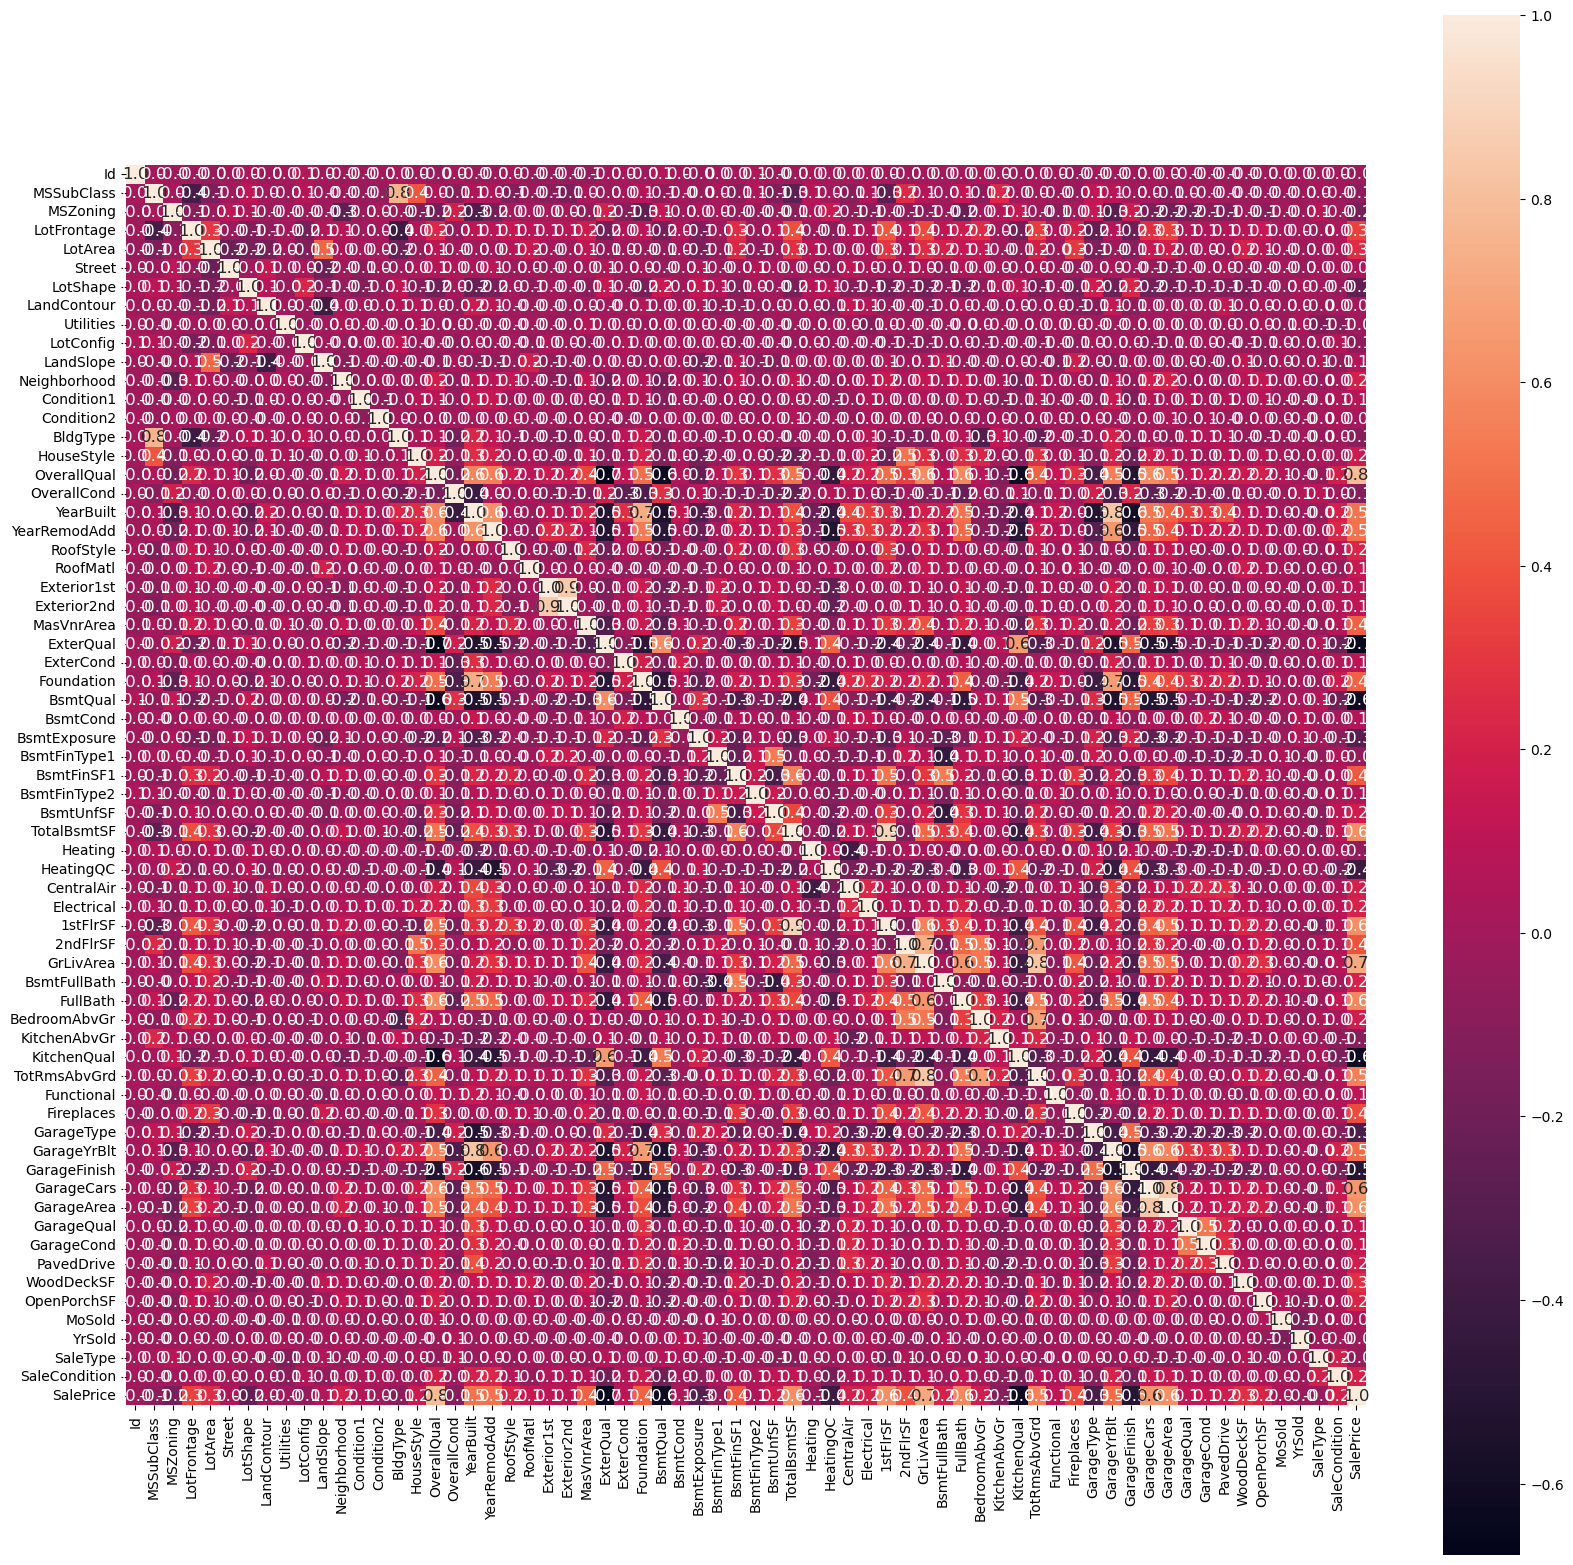

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
# constructing a heatmap to nderstand the correlation
plt.figure(figsize=(20,20))
sns.heatmap(correlation, square=True, fmt='.1f', annot=True,annot_kws={'size':12})

In [42]:
G1 = df.iloc[ : , :19]
G1.shape

(1346, 19)

In [43]:
G2 = df.iloc[:, 19:38]
G2.shape

(1346, 19)

In [44]:
G3 = df.iloc[:, 38:57]
G3.shape

(1346, 19)

In [45]:
G4 = df.iloc[:, 57:66]
G4.shape

(1346, 9)

<Axes: >

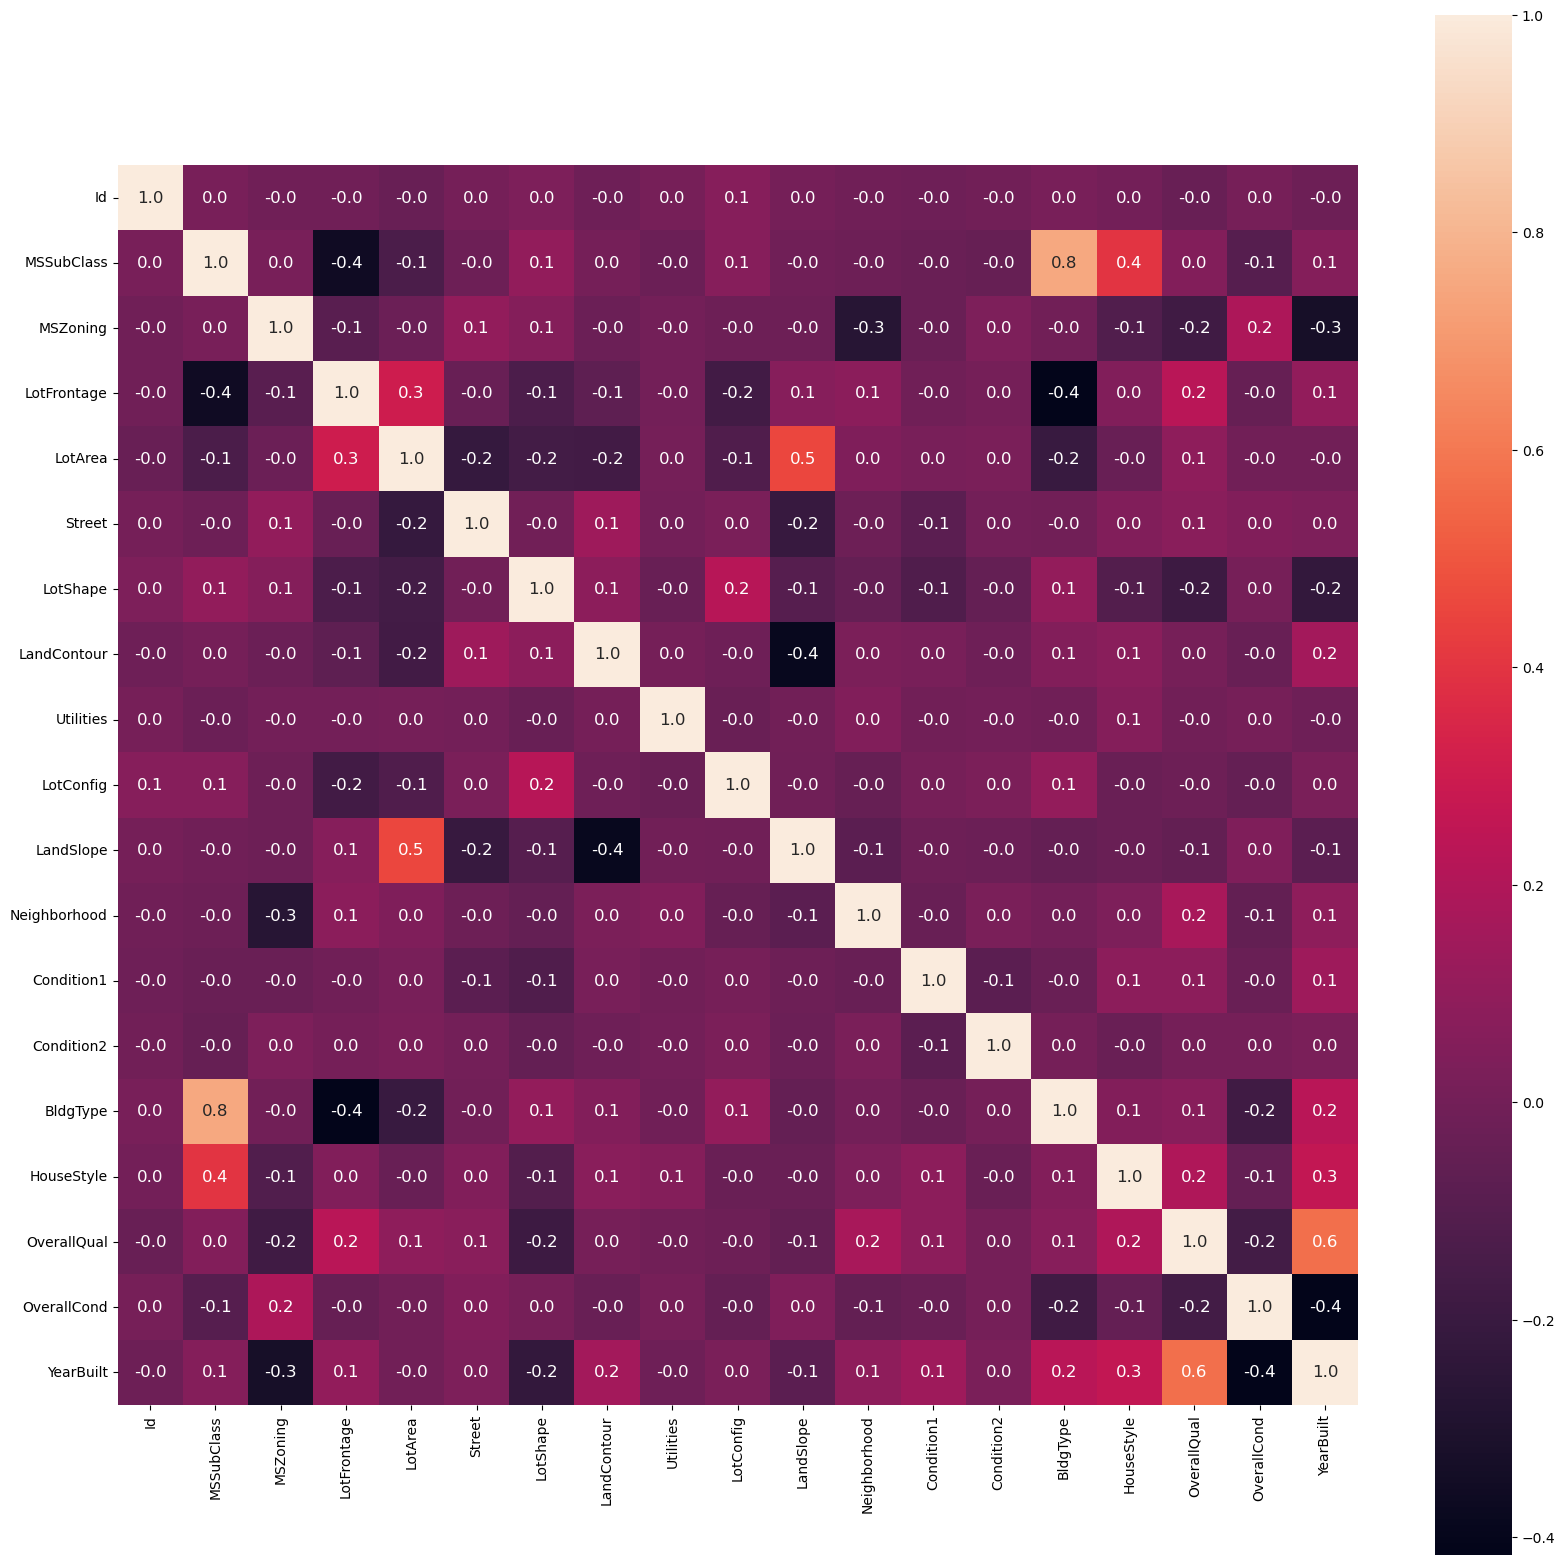

In [46]:
# constructing a heatmap to understand the correlation
correlation = G1.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, square=True, fmt='.1f', annot=True,annot_kws={'size':12})

In [47]:
# axis = 1 for column drop
G1 =G1.drop(['OverallCond','Condition2','Condition1','Neighborhood','LandSlope' , 'Id' ,'MSZoning' , 'Street' , 'LandContour' , 'Utilities' ,'LotConfig' ] , axis = 1)
G1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1346 entries, 0 to 1459
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1346 non-null   int64  
 1   LotFrontage  1346 non-null   float64
 2   LotArea      1346 non-null   int64  
 3   LotShape     1346 non-null   int64  
 4   BldgType     1346 non-null   int64  
 5   HouseStyle   1346 non-null   int64  
 6   OverallQual  1346 non-null   int64  
 7   YearBuilt    1346 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 94.6 KB


<Axes: >

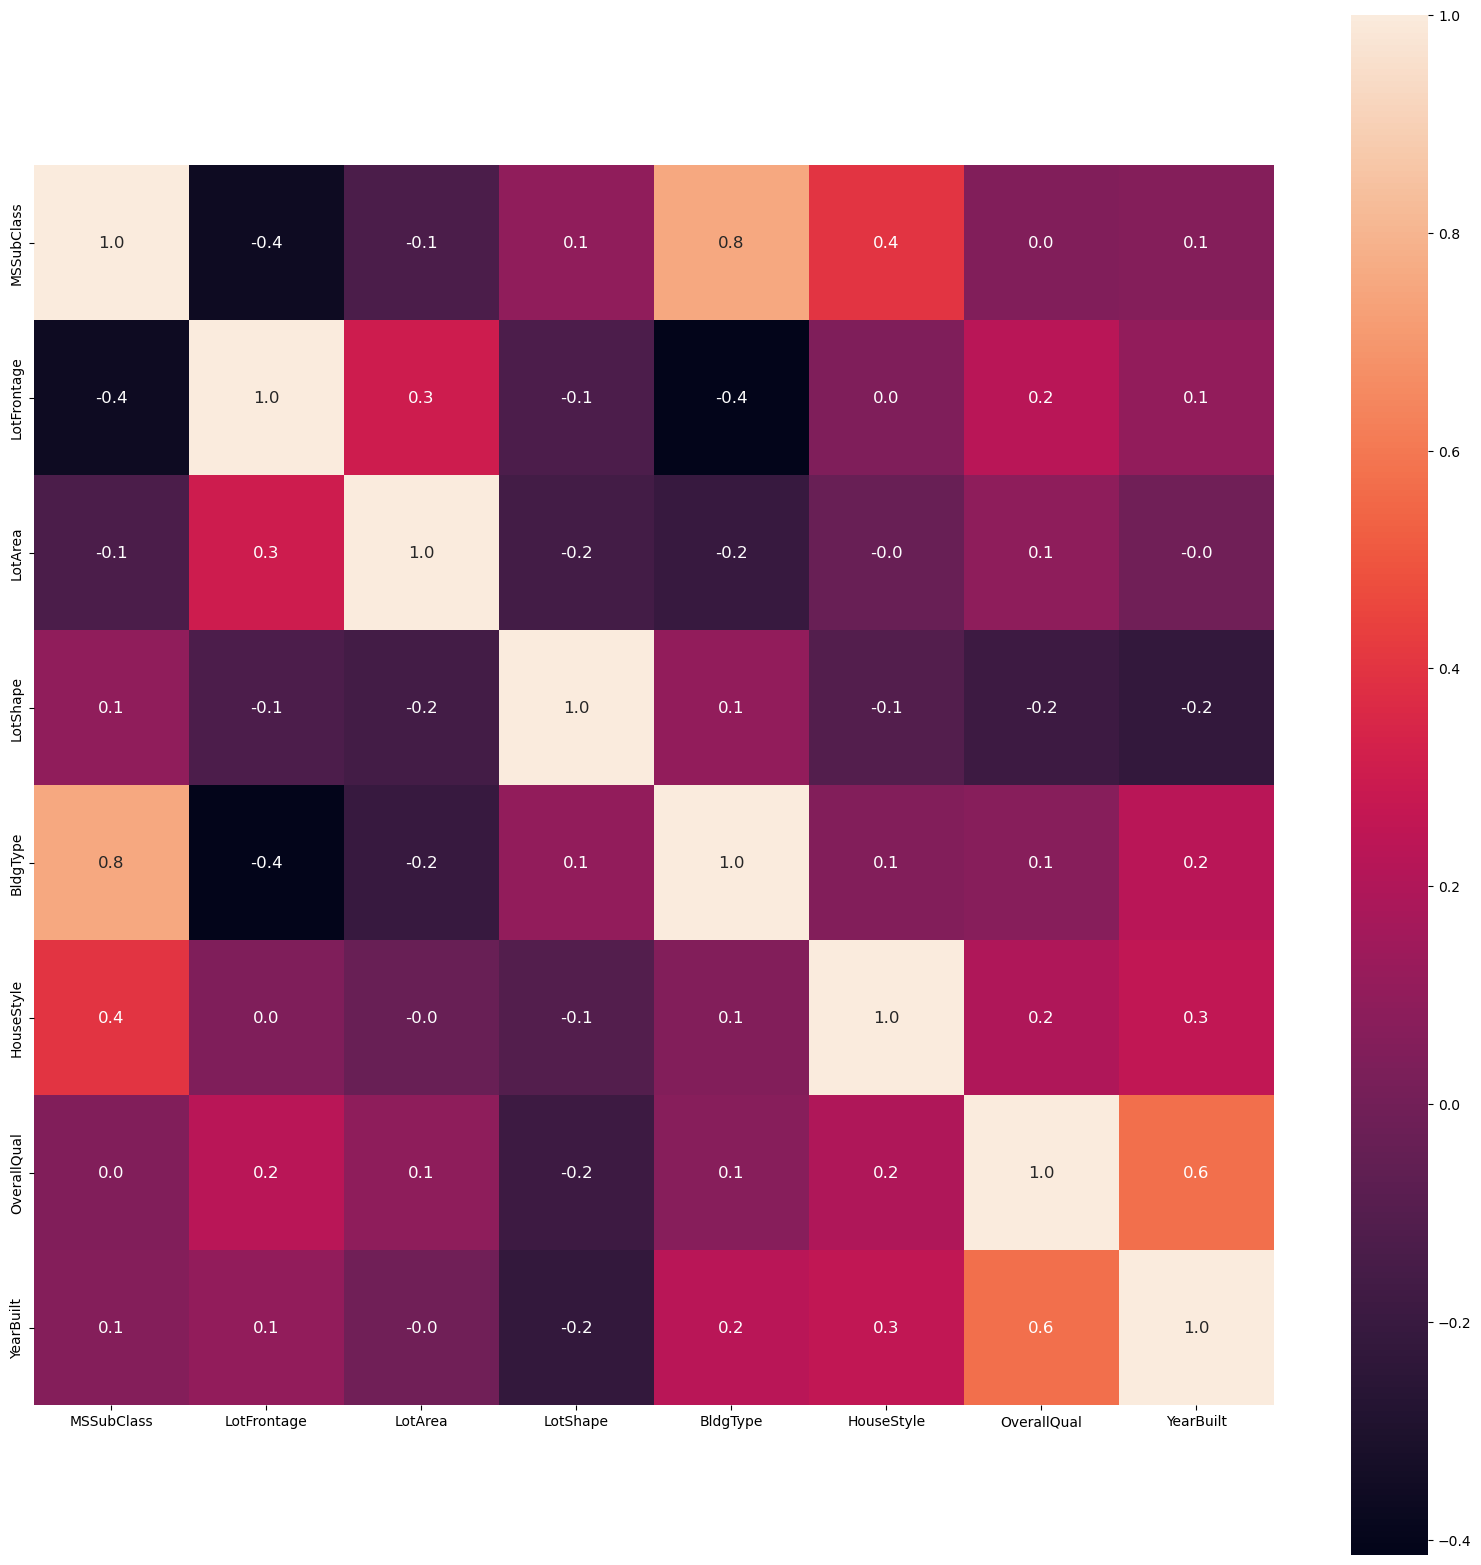

In [48]:
# constructing a heatmap to nderstand the correlation
correlation = G1.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, square=True, fmt='.1f', annot=True,annot_kws={'size':12})

In [49]:
# axis = 1 for column drop
df =df.drop(['OverallCond','Condition2','Condition1','Neighborhood','LandSlope' , 'Id' ,'MSZoning' , 'Street' , 'LandContour' , 'Utilities' ,'LotConfig' ] , axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1346 entries, 0 to 1459
Data columns (total 55 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1346 non-null   int64  
 1   LotFrontage    1346 non-null   float64
 2   LotArea        1346 non-null   int64  
 3   LotShape       1346 non-null   int64  
 4   BldgType       1346 non-null   int64  
 5   HouseStyle     1346 non-null   int64  
 6   OverallQual    1346 non-null   int64  
 7   YearBuilt      1346 non-null   int64  
 8   YearRemodAdd   1346 non-null   int64  
 9   RoofStyle      1346 non-null   int64  
 10  RoofMatl       1346 non-null   int64  
 11  Exterior1st    1346 non-null   int64  
 12  Exterior2nd    1346 non-null   int64  
 13  MasVnrArea     1346 non-null   float64
 14  ExterQual      1346 non-null   int64  
 15  ExterCond      1346 non-null   int64  
 16  Foundation     1346 non-null   int64  
 17  BsmtQual       1346 non-null   int64  
 18  BsmtCond     

<Axes: >

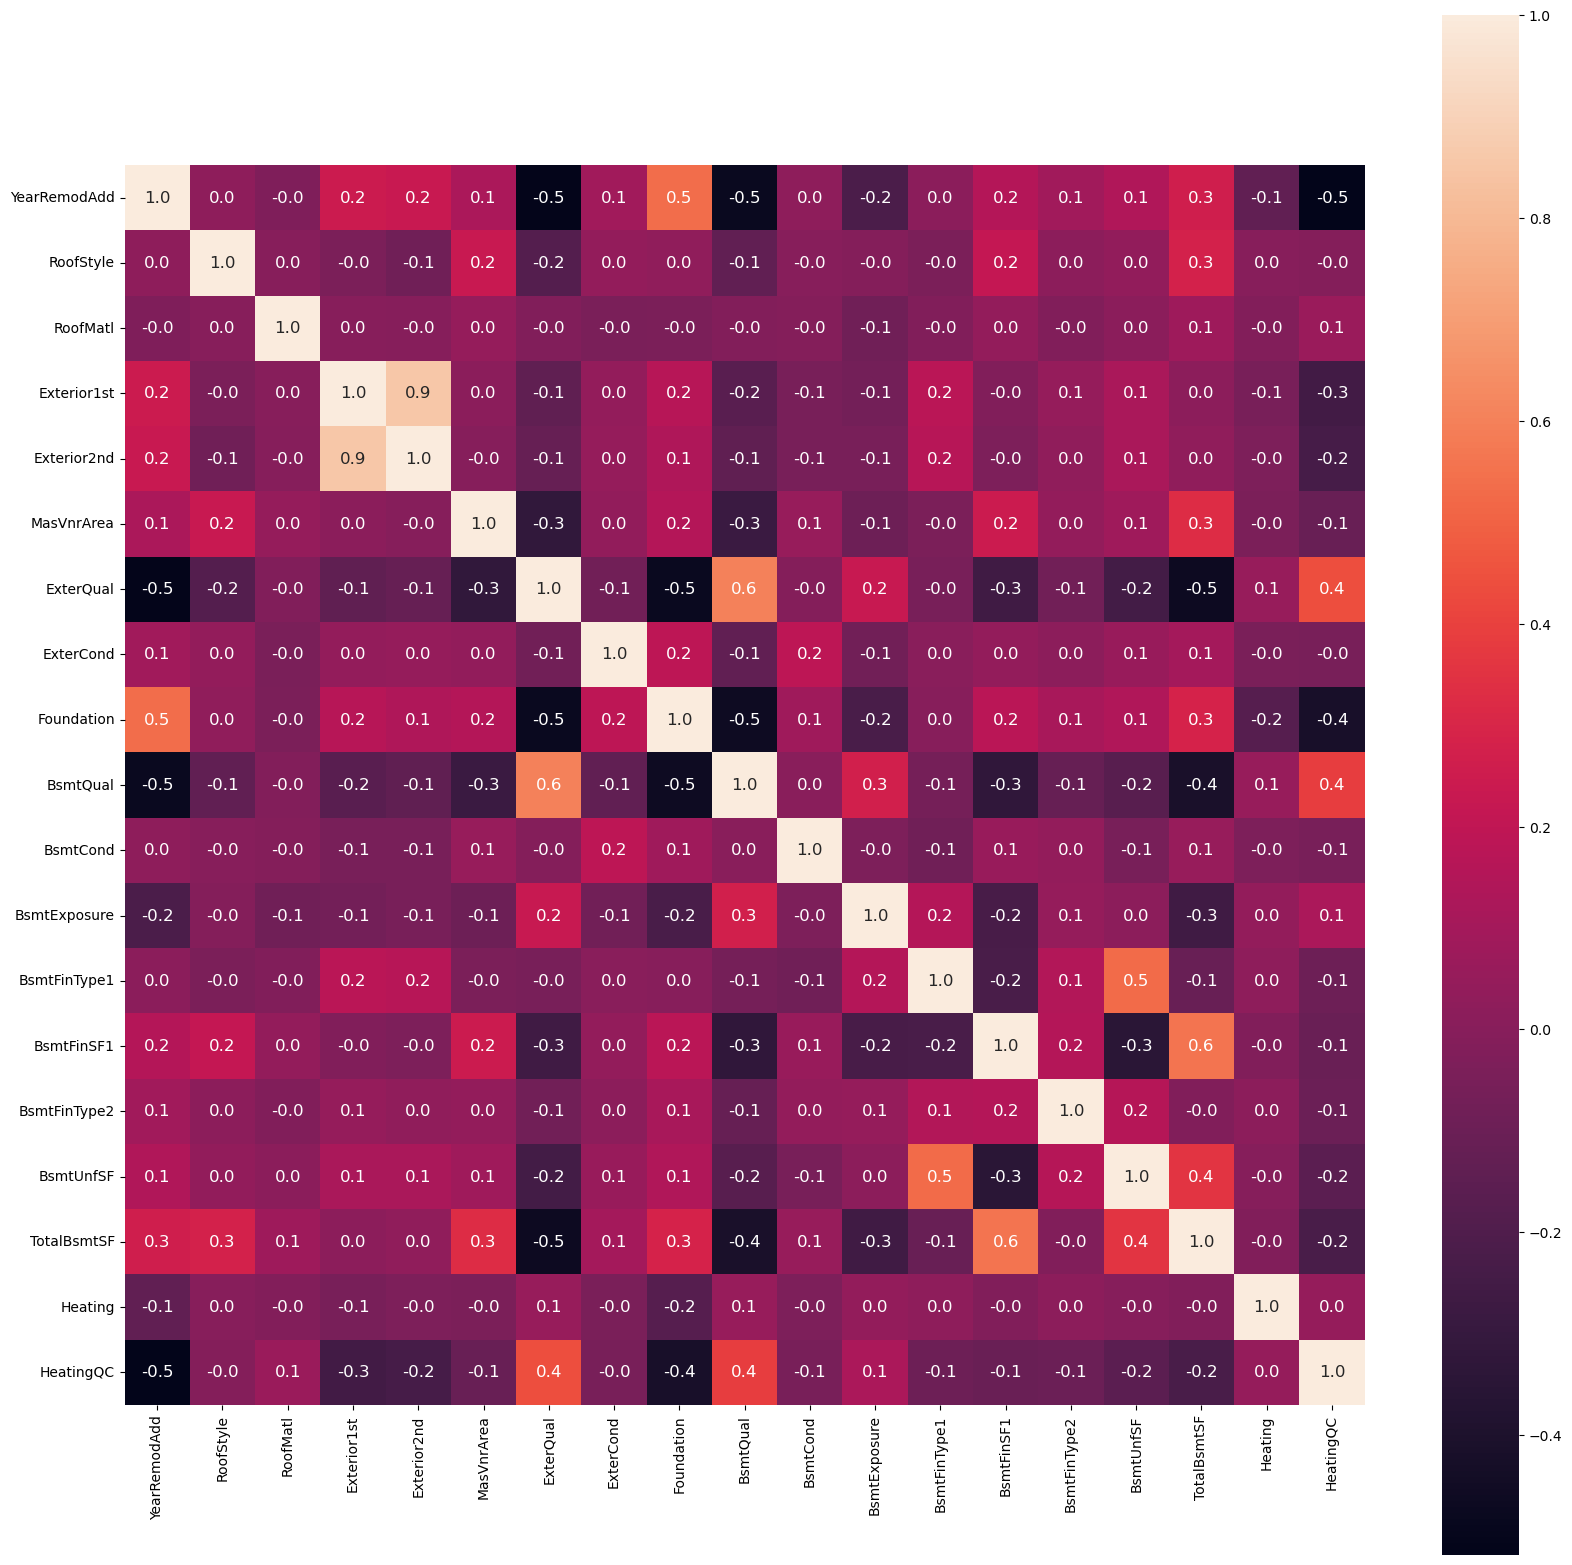

In [50]:
# constructing a heatmap to nderstand the correlation
correlation = G2.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, square=True, fmt='.1f', annot=True,annot_kws={'size':12})

In [51]:
# axis = 1 for column drop
G2 = G2.drop([ 'Heating', 'ExterCond','RoofMatl' ,'RoofStyle'] , axis= 1)
G2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1346 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YearRemodAdd  1346 non-null   int64  
 1   Exterior1st   1346 non-null   int64  
 2   Exterior2nd   1346 non-null   int64  
 3   MasVnrArea    1346 non-null   float64
 4   ExterQual     1346 non-null   int64  
 5   Foundation    1346 non-null   int64  
 6   BsmtQual      1346 non-null   int64  
 7   BsmtCond      1346 non-null   int64  
 8   BsmtExposure  1346 non-null   int64  
 9   BsmtFinType1  1346 non-null   int64  
 10  BsmtFinSF1    1346 non-null   float64
 11  BsmtFinType2  1346 non-null   int64  
 12  BsmtUnfSF     1346 non-null   float64
 13  TotalBsmtSF   1346 non-null   int64  
 14  HeatingQC     1346 non-null   int64  
dtypes: float64(3), int64(12)
memory usage: 168.2 KB


In [52]:
# axis = 1 for column drop
df = df.drop([ 'Heating', 'ExterCond','RoofMatl' ,'RoofStyle'] , axis= 1)

<Axes: >

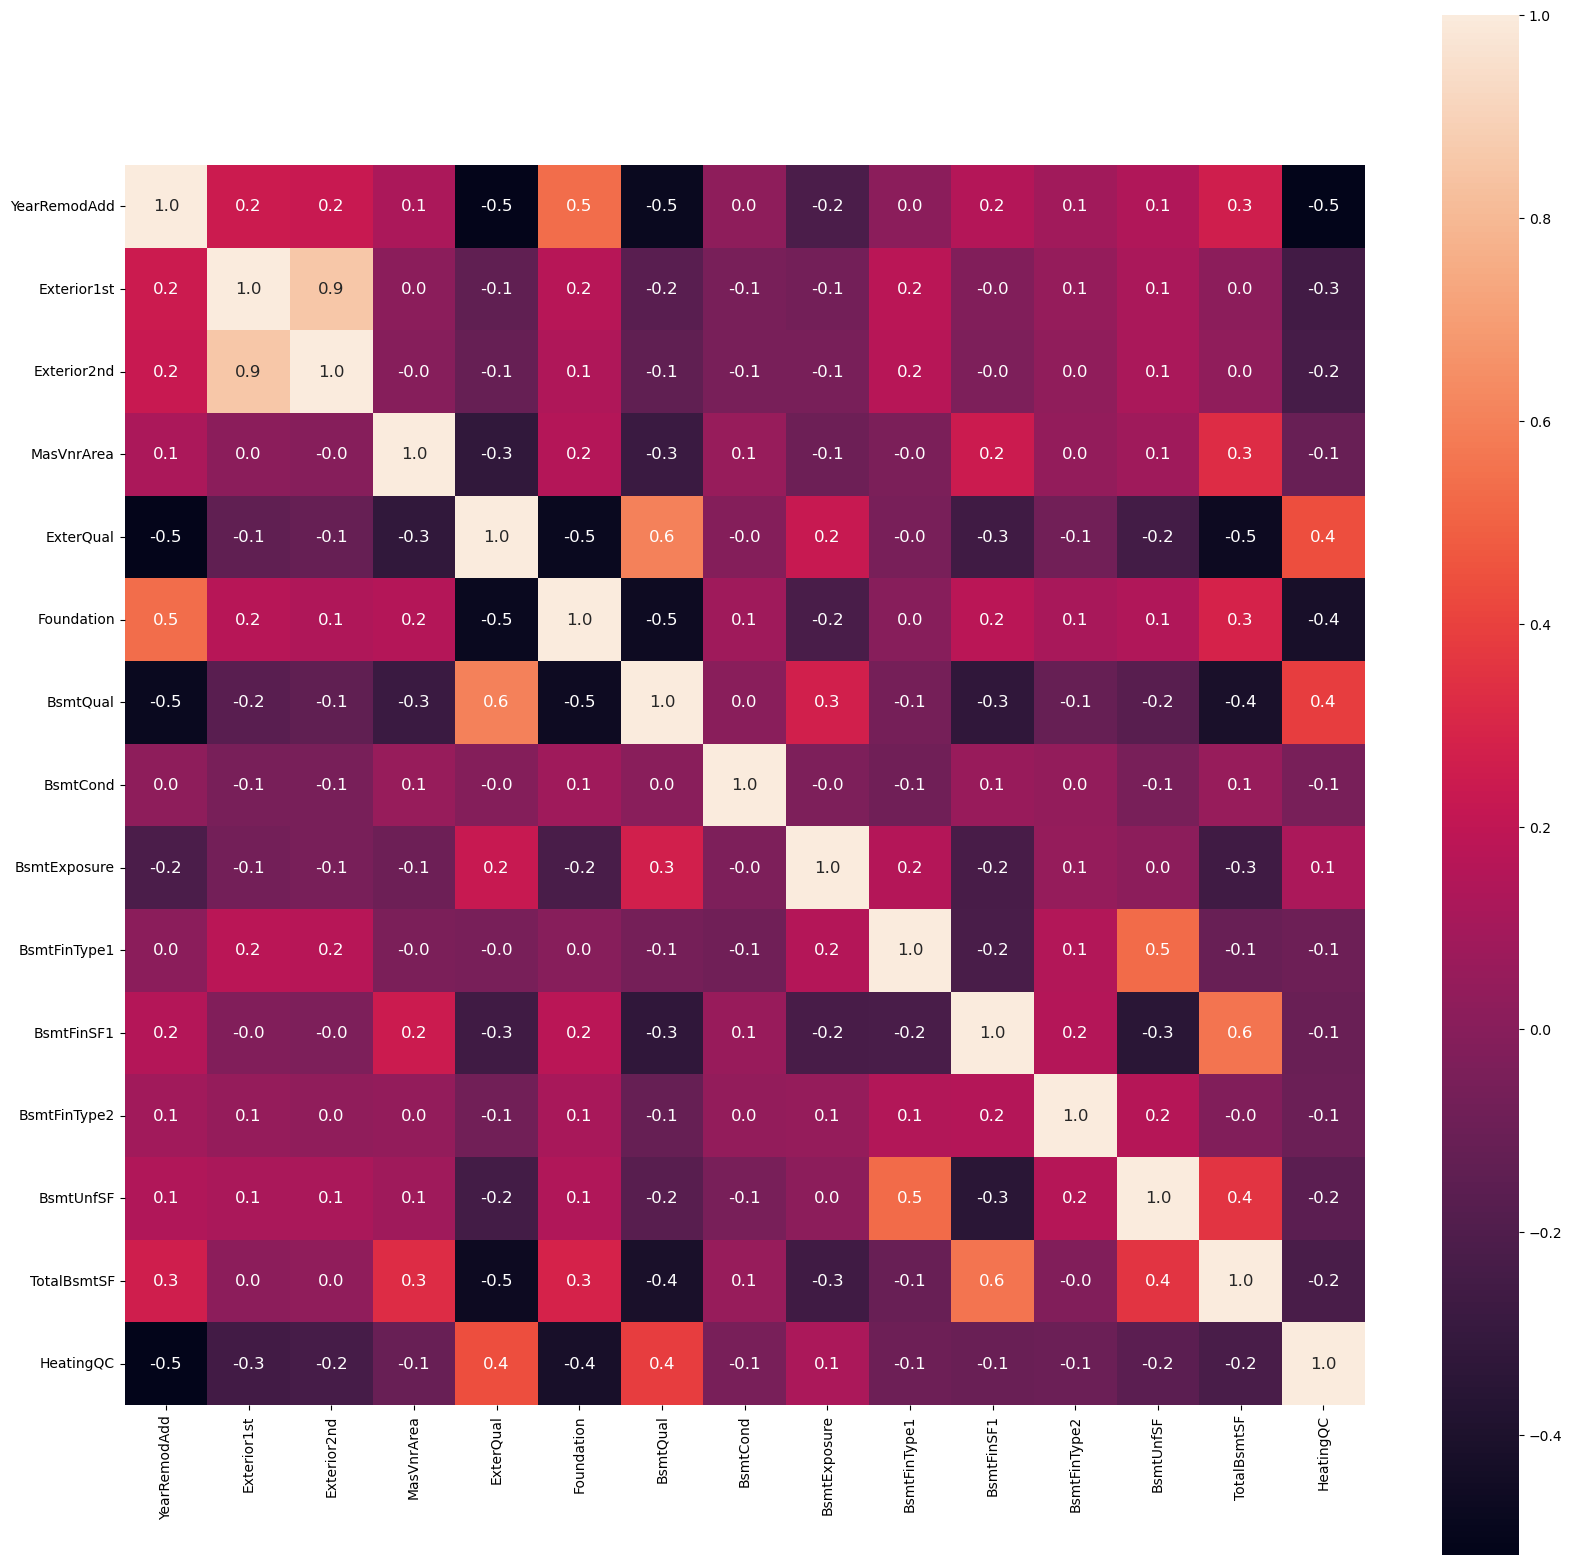

In [53]:
# constructing a heatmap to nderstand the correlation
correlation = G2.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, square=True, fmt='.1f', annot=True,annot_kws={'size':12})

In [54]:
G2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1346 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YearRemodAdd  1346 non-null   int64  
 1   Exterior1st   1346 non-null   int64  
 2   Exterior2nd   1346 non-null   int64  
 3   MasVnrArea    1346 non-null   float64
 4   ExterQual     1346 non-null   int64  
 5   Foundation    1346 non-null   int64  
 6   BsmtQual      1346 non-null   int64  
 7   BsmtCond      1346 non-null   int64  
 8   BsmtExposure  1346 non-null   int64  
 9   BsmtFinType1  1346 non-null   int64  
 10  BsmtFinSF1    1346 non-null   float64
 11  BsmtFinType2  1346 non-null   int64  
 12  BsmtUnfSF     1346 non-null   float64
 13  TotalBsmtSF   1346 non-null   int64  
 14  HeatingQC     1346 non-null   int64  
dtypes: float64(3), int64(12)
memory usage: 168.2 KB


<Axes: >

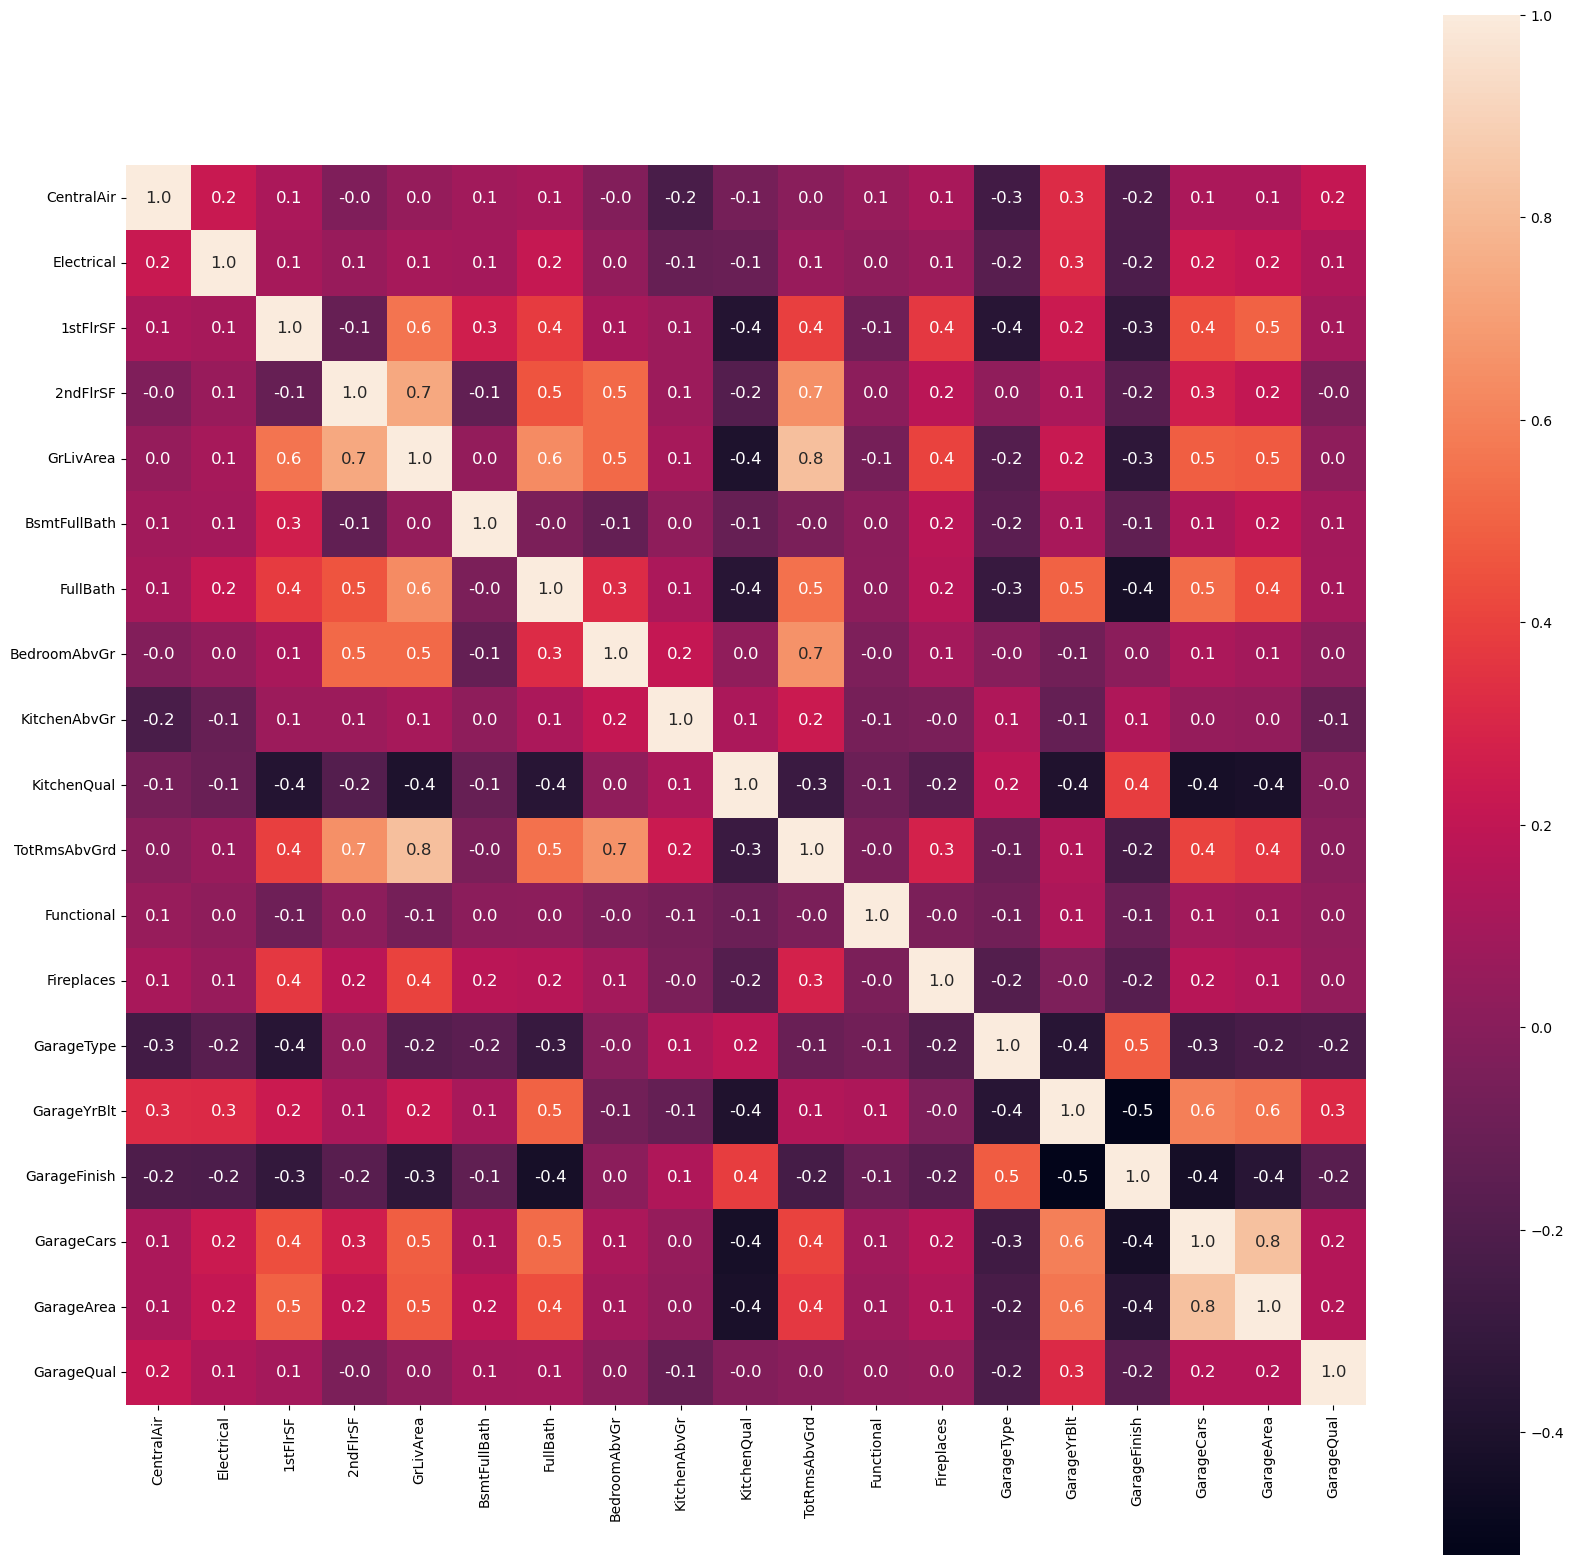

In [55]:
# constructing a heatmap to nderstand the correlation
correlation = G3.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, square=True, fmt='.1f', annot=True,annot_kws={'size':12})

<Axes: >

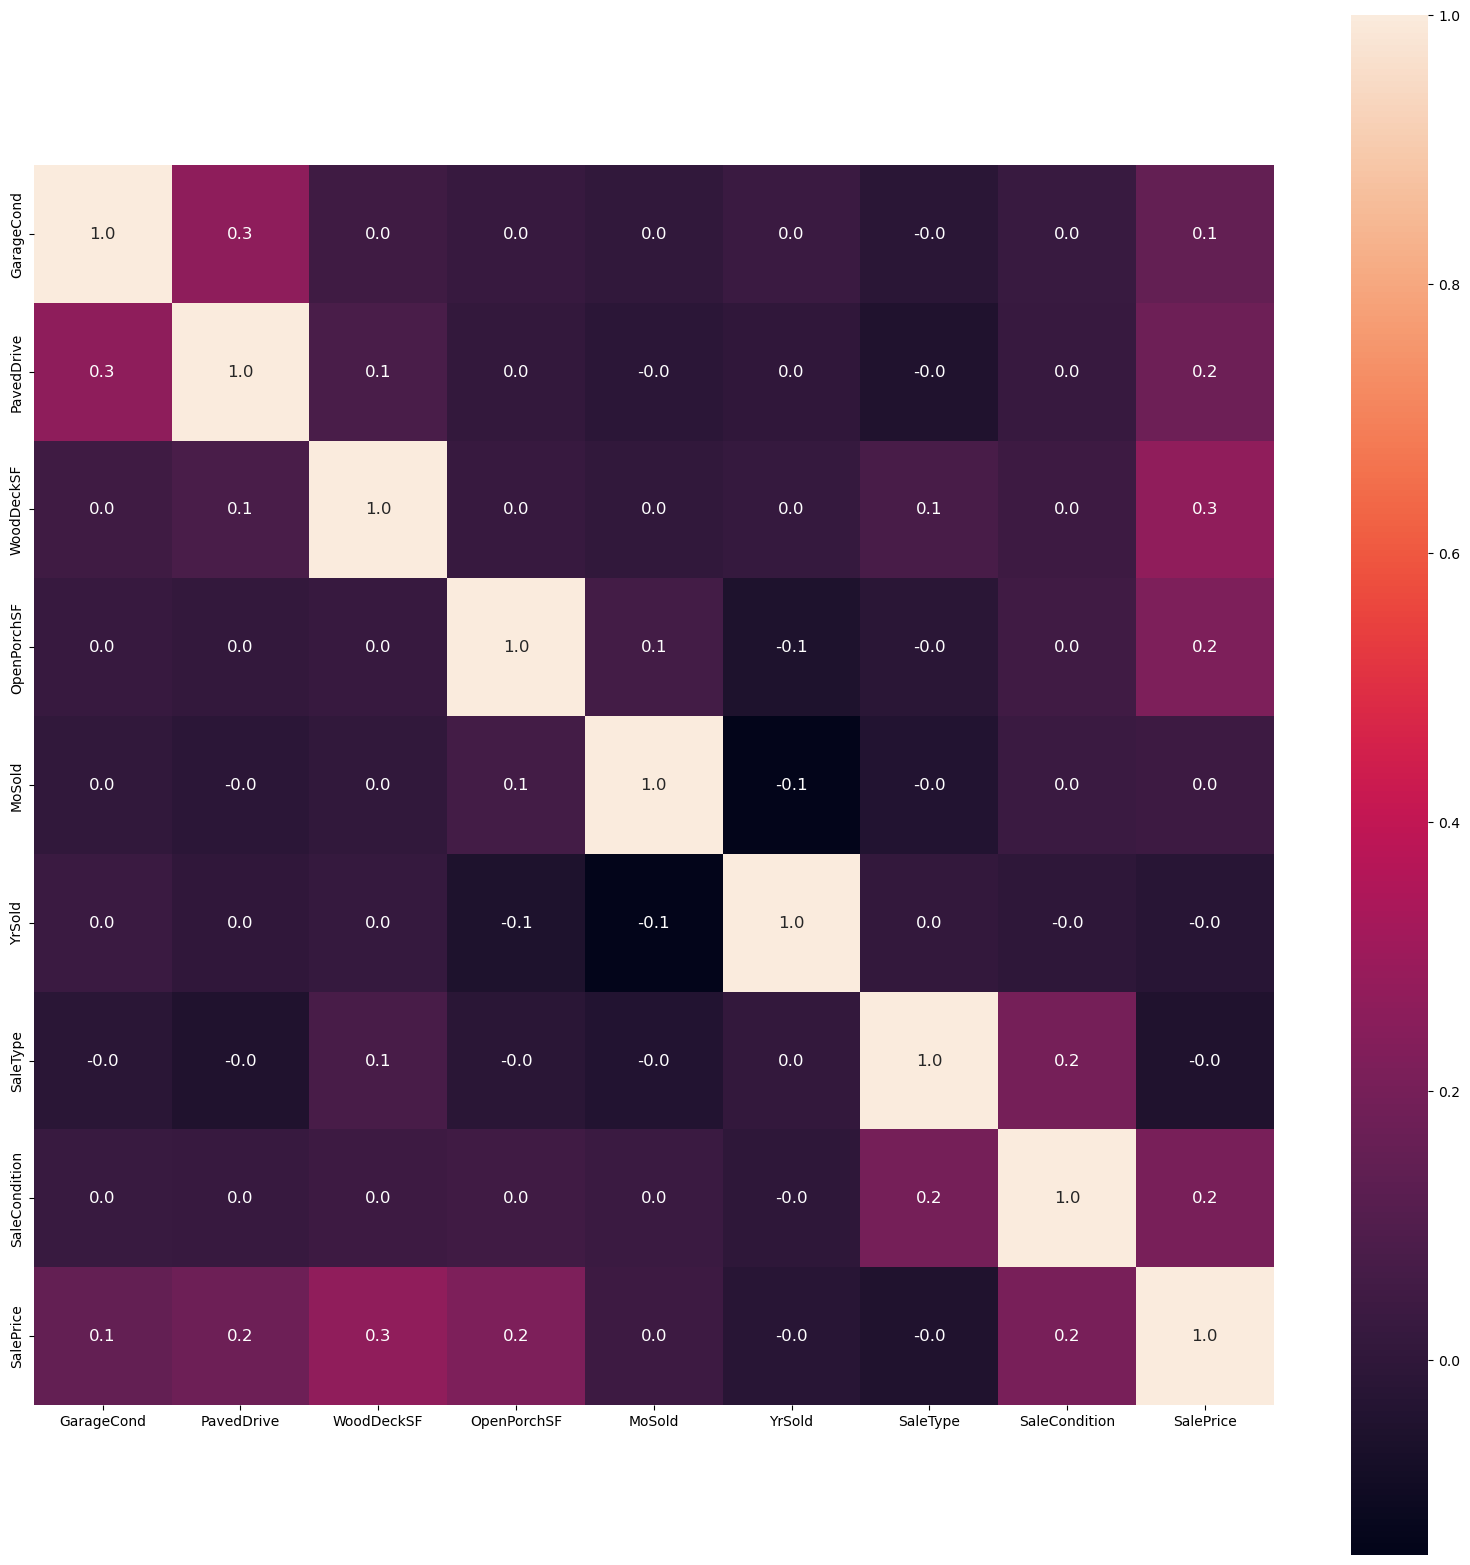

In [56]:
# constructing a heatmap to nderstand the correlation
correlation = G4.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, square=True, fmt='.1f', annot=True,annot_kws={'size':12})

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1346 entries, 0 to 1459
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1346 non-null   int64  
 1   LotFrontage    1346 non-null   float64
 2   LotArea        1346 non-null   int64  
 3   LotShape       1346 non-null   int64  
 4   BldgType       1346 non-null   int64  
 5   HouseStyle     1346 non-null   int64  
 6   OverallQual    1346 non-null   int64  
 7   YearBuilt      1346 non-null   int64  
 8   YearRemodAdd   1346 non-null   int64  
 9   Exterior1st    1346 non-null   int64  
 10  Exterior2nd    1346 non-null   int64  
 11  MasVnrArea     1346 non-null   float64
 12  ExterQual      1346 non-null   int64  
 13  Foundation     1346 non-null   int64  
 14  BsmtQual       1346 non-null   int64  
 15  BsmtCond       1346 non-null   int64  
 16  BsmtExposure   1346 non-null   int64  
 17  BsmtFinType1   1346 non-null   int64  
 18  BsmtFinSF1   

<Axes: >

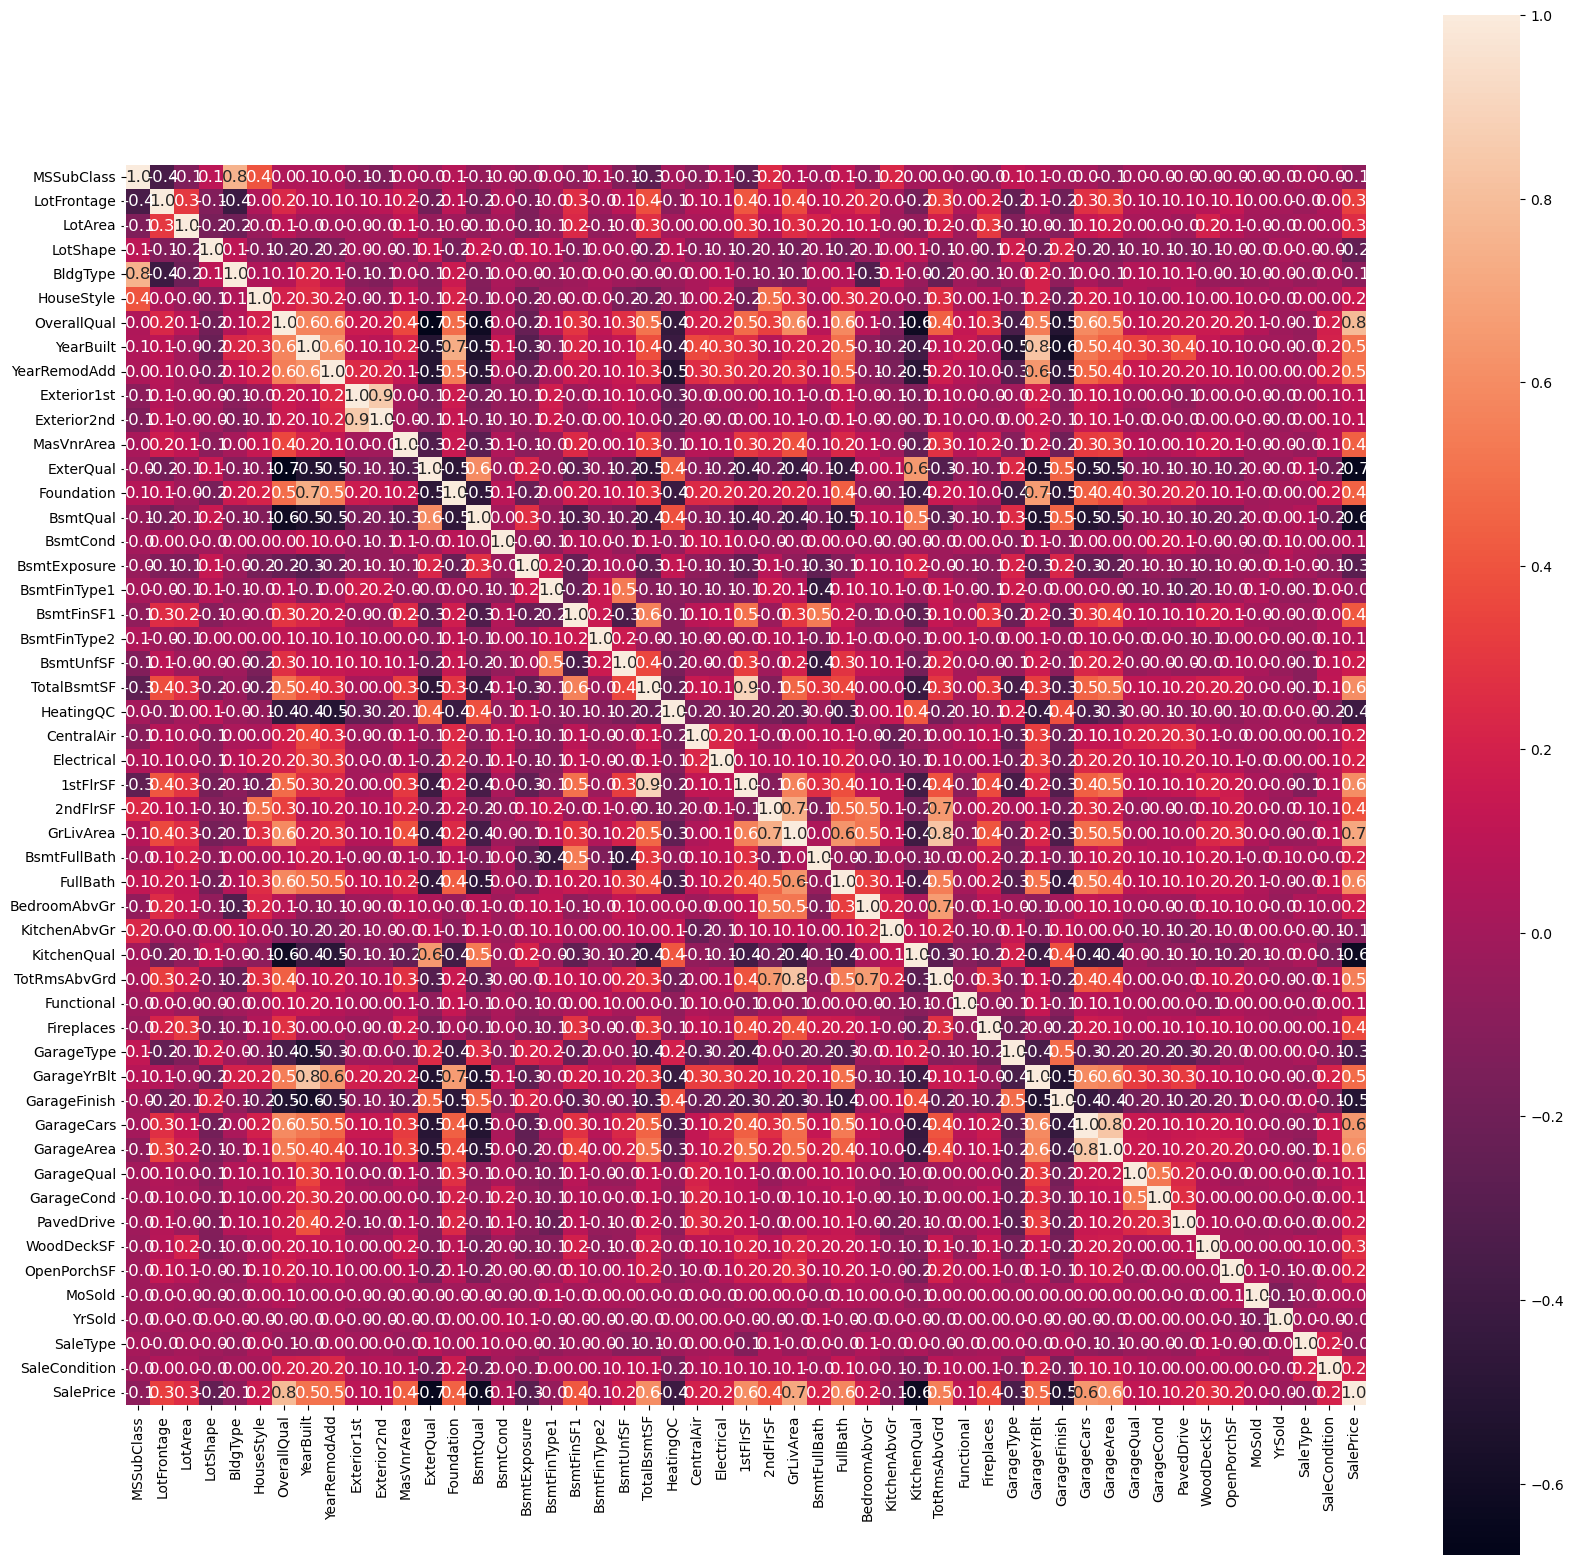

In [58]:
# constructing a heatmap to nderstand the correlation
correlation = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, square=True, fmt='.1f', annot=True,annot_kws={'size':12})

In [59]:
G1 = df.iloc[ : , 30:51]
G1.shape

(1346, 21)

In [60]:
G2 = df.iloc[ : ,10 :30]
G2.shape

(1346, 20)

In [61]:
G3 = df.iloc[ : , :10]
G3.shape

(1346, 10)

<Axes: >

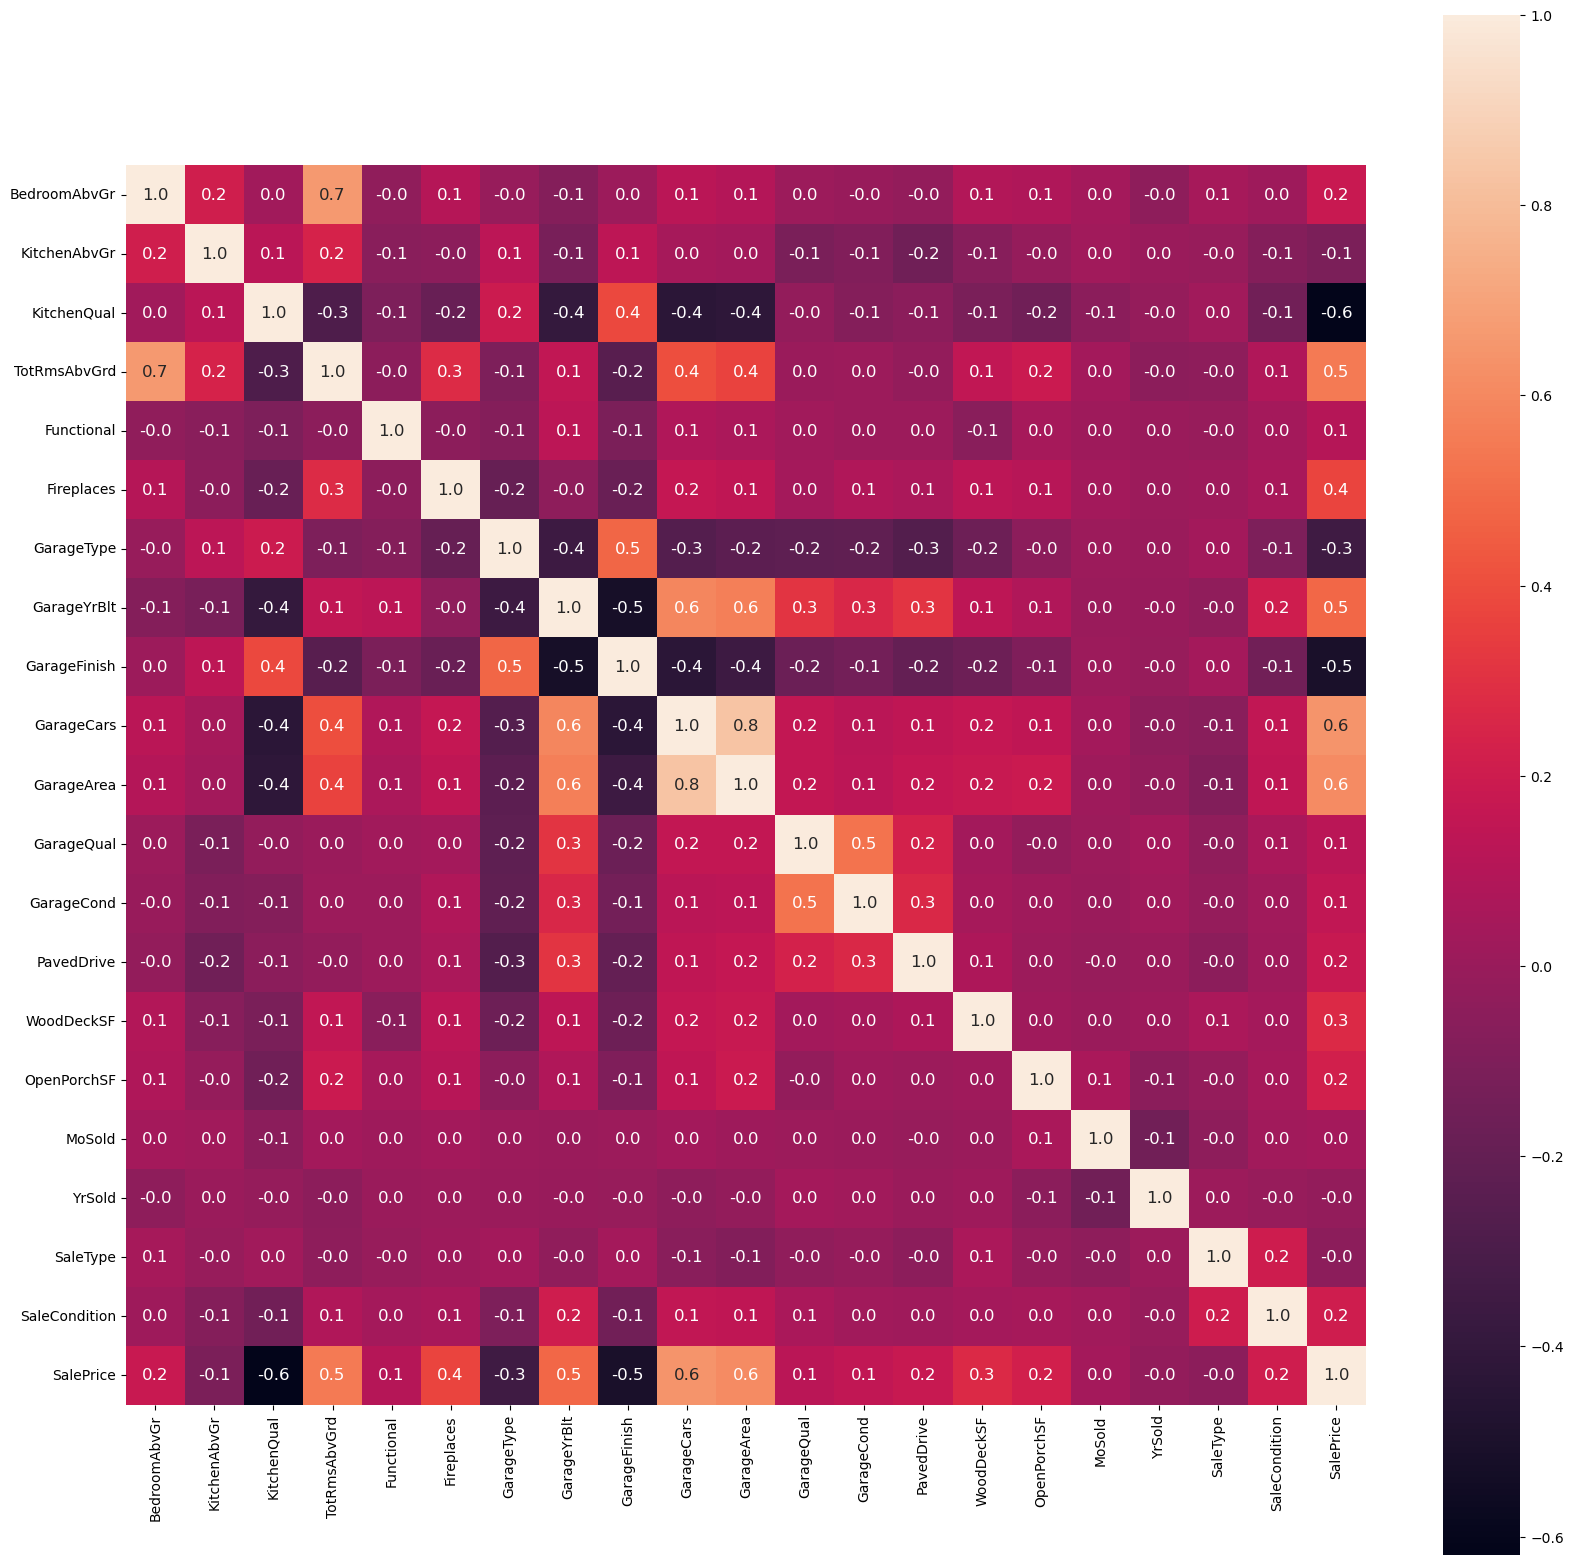

In [62]:
# constructing a heatmap to nderstand the correlation
correlation = G1.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, square=True, fmt='.1f', annot=True,annot_kws={'size':12})

In [63]:
# axis = 1 for column drop
G1 = G1.drop(['BedroomAbvGr','Functional','GarageQual','GarageCond','OpenPorchSF','MoSold','YrSold','SaleType'] , axis= 1)
G1.info()
 

<class 'pandas.core.frame.DataFrame'>
Index: 1346 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   KitchenAbvGr   1346 non-null   int64  
 1   KitchenQual    1346 non-null   int64  
 2   TotRmsAbvGrd   1346 non-null   int64  
 3   Fireplaces     1346 non-null   float64
 4   GarageType     1346 non-null   int64  
 5   GarageYrBlt    1346 non-null   float64
 6   GarageFinish   1346 non-null   int64  
 7   GarageCars     1346 non-null   int64  
 8   GarageArea     1346 non-null   int64  
 9   PavedDrive     1346 non-null   int64  
 10  WoodDeckSF     1346 non-null   float64
 11  SaleCondition  1346 non-null   int64  
 12  SalePrice      1346 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 147.2 KB


In [64]:
df= df.drop(['BedroomAbvGr','Functional','GarageQual','GarageCond','OpenPorchSF','MoSold','YrSold','SaleType'] , axis= 1)

<Axes: >

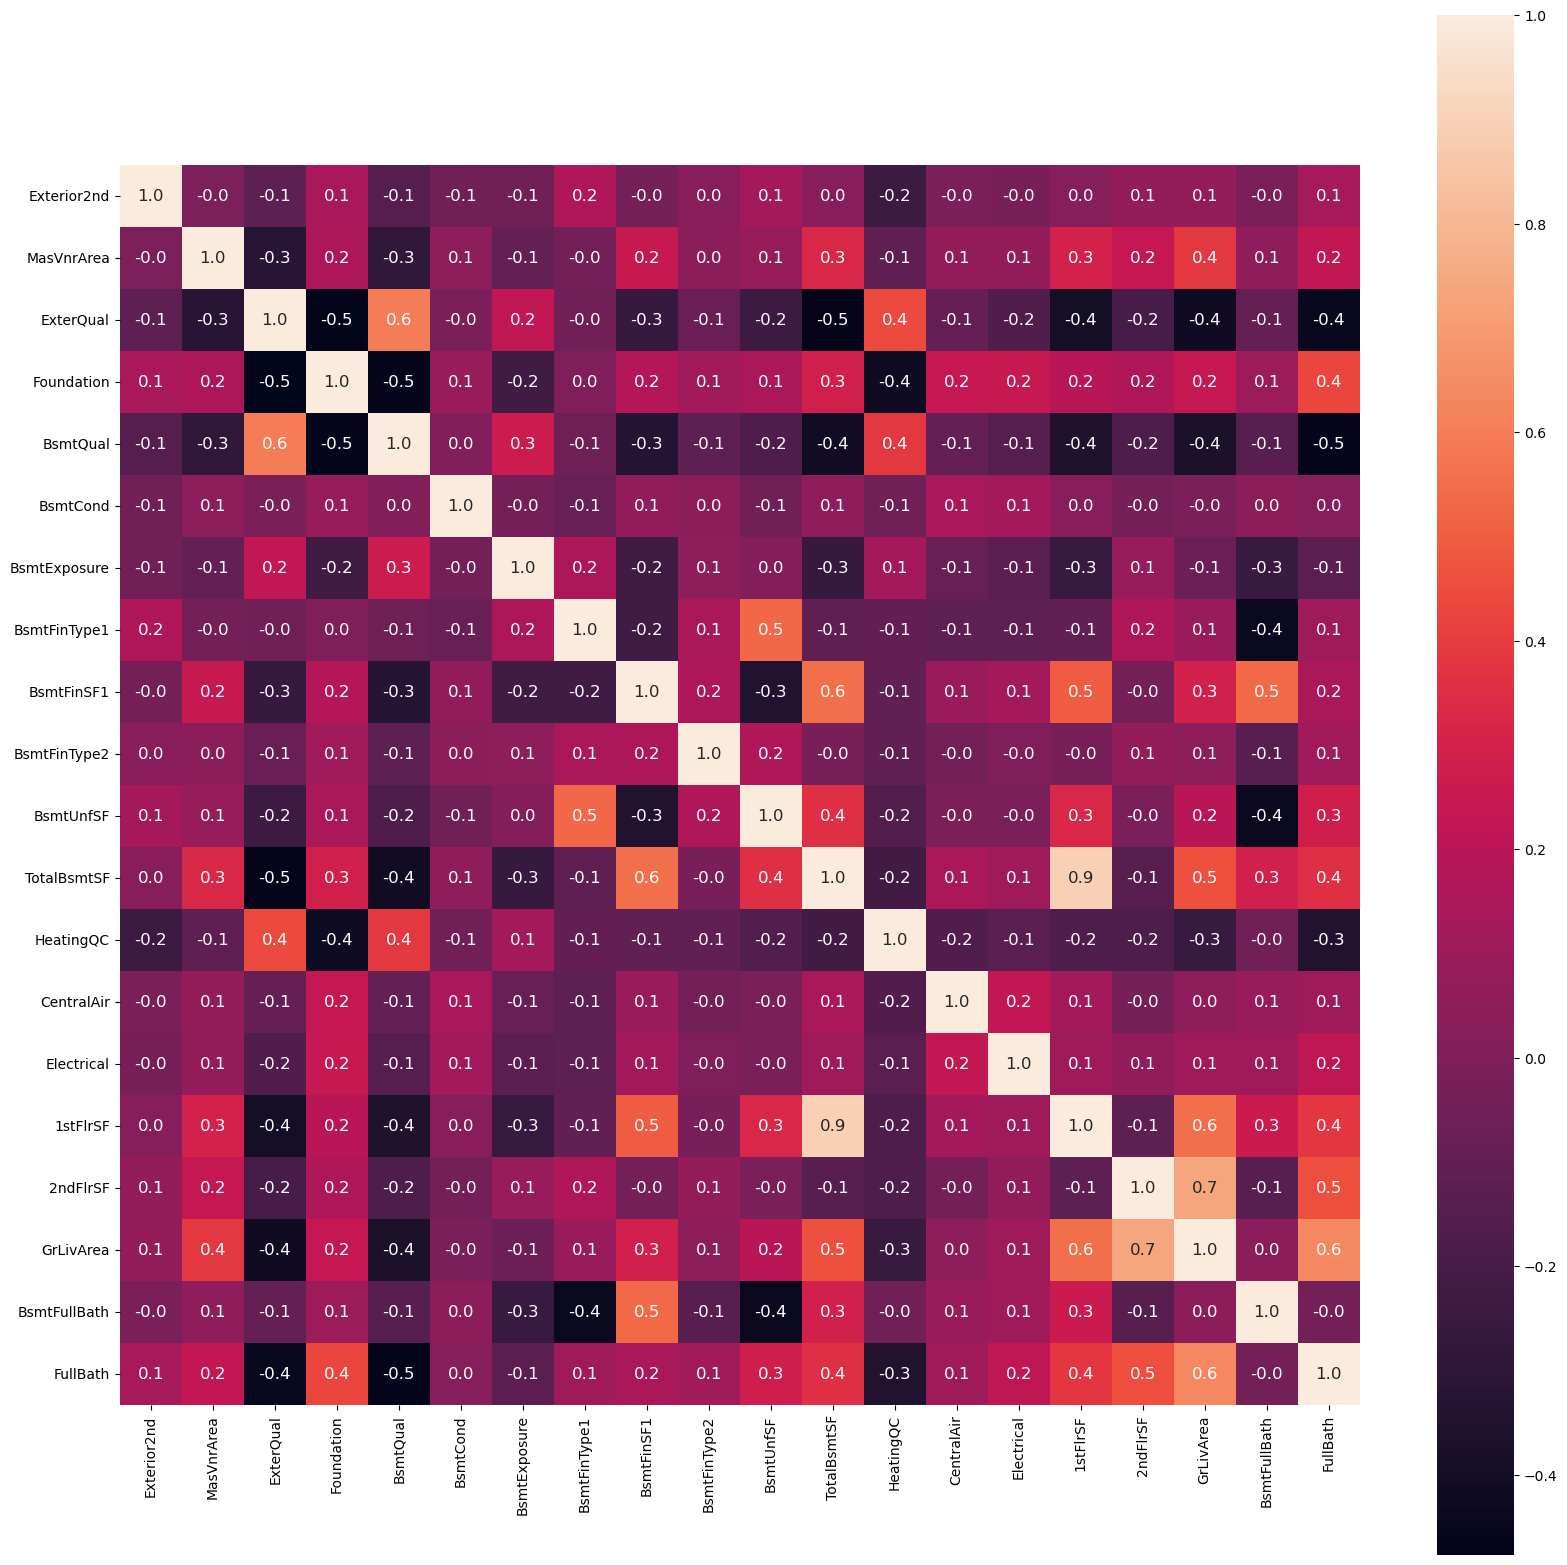

In [65]:
# constructing a heatmap to nderstand the correlation
correlation = G2.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, square=True, fmt='.1f', annot=True,annot_kws={'size':12})

<Axes: >

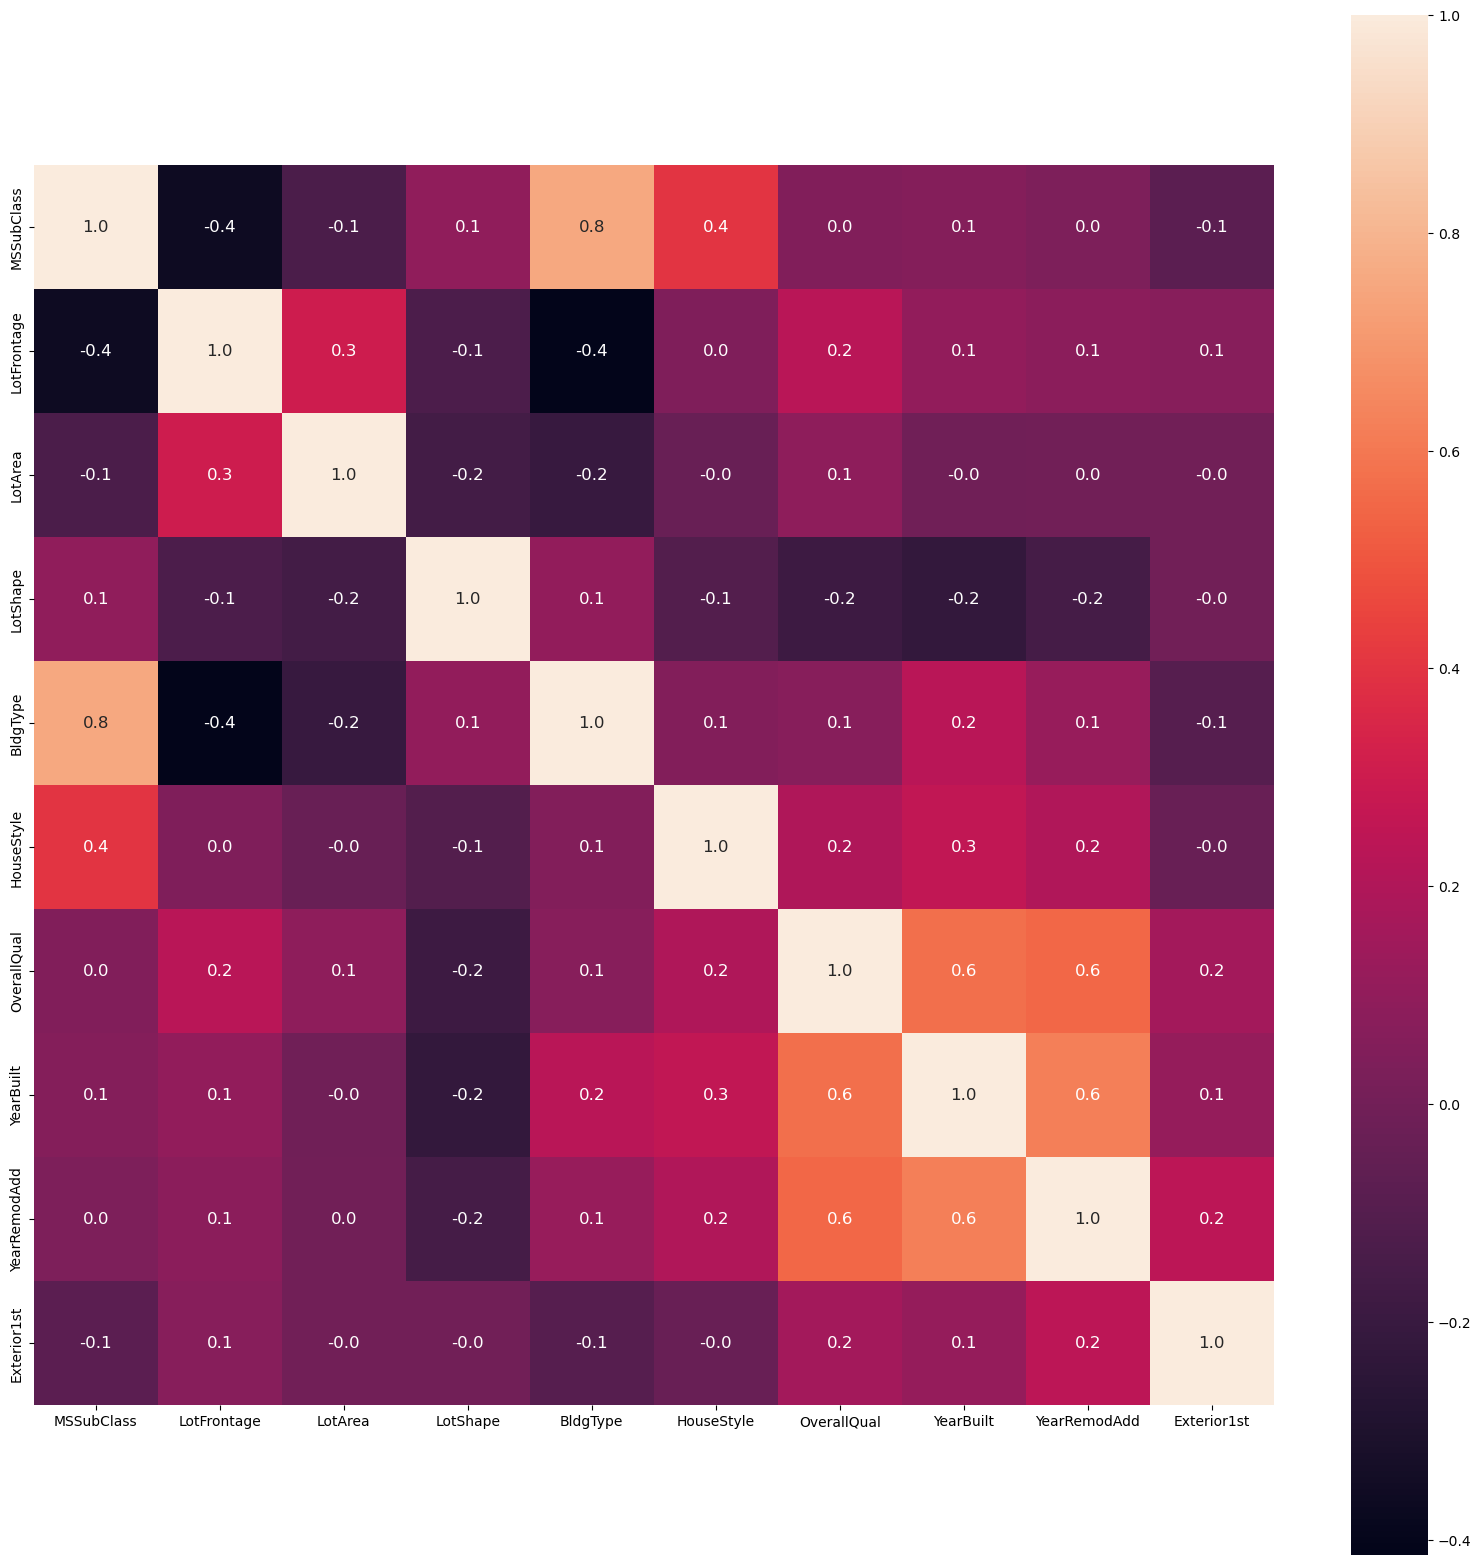

In [66]:
# constructing a heatmap to nderstand the correlation
correlation = G3.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, square=True, fmt='.1f', annot=True,annot_kws={'size':12})

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1346 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1346 non-null   int64  
 1   LotFrontage    1346 non-null   float64
 2   LotArea        1346 non-null   int64  
 3   LotShape       1346 non-null   int64  
 4   BldgType       1346 non-null   int64  
 5   HouseStyle     1346 non-null   int64  
 6   OverallQual    1346 non-null   int64  
 7   YearBuilt      1346 non-null   int64  
 8   YearRemodAdd   1346 non-null   int64  
 9   Exterior1st    1346 non-null   int64  
 10  Exterior2nd    1346 non-null   int64  
 11  MasVnrArea     1346 non-null   float64
 12  ExterQual      1346 non-null   int64  
 13  Foundation     1346 non-null   int64  
 14  BsmtQual       1346 non-null   int64  
 15  BsmtCond       1346 non-null   int64  
 16  BsmtExposure   1346 non-null   int64  
 17  BsmtFinType1   1346 non-null   int64  
 18  BsmtFinSF1   

In [68]:
df['SalePrice'].value_counts()

SalePrice
140000    20
135000    16
145000    14
155000    14
190000    13
          ..
216000     1
144152     1
156932     1
410000     1
283463     1
Name: count, Length: 626, dtype: int64

In [69]:
df = df[df['SalePrice']!=1]
df.shape

(1346, 43)

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

Data Spliting

In [71]:
X=df.drop("SalePrice", axis = 1)
Y = df["SalePrice"]

In [72]:
X.info()
X.shape

<class 'pandas.core.frame.DataFrame'>
Index: 1346 entries, 0 to 1459
Data columns (total 42 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1346 non-null   int64  
 1   LotFrontage    1346 non-null   float64
 2   LotArea        1346 non-null   int64  
 3   LotShape       1346 non-null   int64  
 4   BldgType       1346 non-null   int64  
 5   HouseStyle     1346 non-null   int64  
 6   OverallQual    1346 non-null   int64  
 7   YearBuilt      1346 non-null   int64  
 8   YearRemodAdd   1346 non-null   int64  
 9   Exterior1st    1346 non-null   int64  
 10  Exterior2nd    1346 non-null   int64  
 11  MasVnrArea     1346 non-null   float64
 12  ExterQual      1346 non-null   int64  
 13  Foundation     1346 non-null   int64  
 14  BsmtQual       1346 non-null   int64  
 15  BsmtCond       1346 non-null   int64  
 16  BsmtExposure   1346 non-null   int64  
 17  BsmtFinType1   1346 non-null   int64  
 18  BsmtFinSF1   

(1346, 42)

In [73]:
Y.info()
Y.shape

<class 'pandas.core.series.Series'>
Index: 1346 entries, 0 to 1459
Series name: SalePrice
Non-Null Count  Dtype
--------------  -----
1346 non-null   int64
dtypes: int64(1)
memory usage: 21.0 KB


(1346,)

In [74]:
from sklearn.model_selection import train_test_split
X_TRAIN , X_TEST , Y_TRAIN, Y_TEST = train_test_split(X,Y, test_size =0.25, random_state=30)
print("Size of Train X = " , len(X_TRAIN))
print("Size of Train Y = " , len(Y_TRAIN))
print("Size of Test X = " , len(X_TEST))
print("Size of Test Y = " , len(Y_TEST))


Size of Train X =  1009
Size of Train Y =  1009
Size of Test X =  337
Size of Test Y =  337


LINEAR REGRESSION

In [75]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X_TRAIN, Y_TRAIN)
LinearRegression()

LinearRegression()

Prediction on Train Data

[225453.1586019  208161.45411194 134165.13012841 ... 259656.52949883
  99946.59803657 118793.48835095]
R squared :  0.8470385089947223
Mean Absolute Error :  19718.45539217186


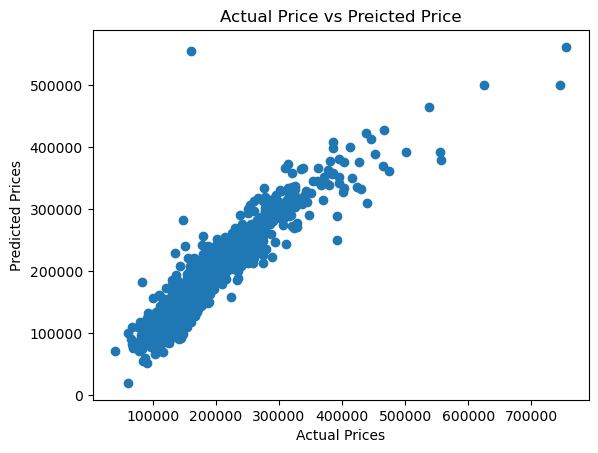

In [76]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_TRAIN)
print(training_data_prediction)
# R squared error
score_1 = metrics.r2_score(Y_TRAIN, training_data_prediction)
# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_TRAIN,
training_data_prediction)
print("R squared : ", score_1)
print('Mean Absolute Error : ', score_2)
plt.scatter(Y_TRAIN, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

Prediction on Test Data

[387867.50959039 168101.42157083 170105.55731705 206793.17794107
 126853.80451601 165089.74852912 125298.83376165  90887.50519163
 141439.60106762 215627.2597414  214289.84313365 184582.30699092
 170799.05352095 190791.97098766 326112.41441815 222793.91978538
 146281.61404207 176515.83831301 220384.60264815 256698.70967205
 104498.91182699 149347.58016769 206333.00045383 185451.12557089
 199796.06914893  99094.18325701 142764.68577909 151496.3028283
 136703.4236668  167679.25045176 278719.74338795 165439.56847223
  75783.99107665  95875.24118585 280691.63529515 129212.90558739
 195996.33929369 328524.528871   144106.72918479 121658.43860158
  96302.58927234 299922.85827327 108177.5755585  244712.01045652
 101878.70102299  94285.87081077 322300.62742521 123637.14663739
 128958.82514562 213948.75893083 120151.87242851 182321.12233637
 169744.44692317 198121.20634724 229157.29708921 128252.79025603
 177035.59031253 205709.88416283 213530.59129918 266835.94565192
 265556.95075754 143601.47

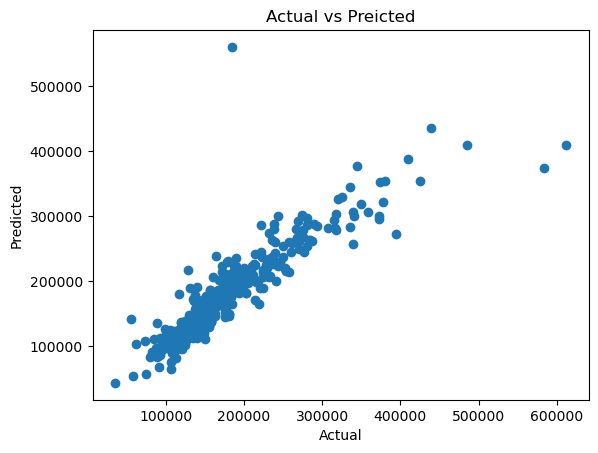

In [77]:
y_pred = model.predict(X_TEST)
y_pred
print(y_pred)
# R squared Score
score_1 = metrics.r2_score(Y_TEST, y_pred)
# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_TEST, y_pred)
print("R squared Score : ", score_1)
print('Mean Absolute Error : ', score_2)
plt.scatter(Y_TEST, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Preicted")
plt.show()

SVM REGRESSION

In [78]:
from sklearn.svm import SVR
svr = SVR(kernel='linear')
svr.fit(X_TRAIN, Y_TRAIN)
SVR(kernel='linear')

SVR(kernel='linear')

Prediction on Train Data

[189899.10668457 207153.99052283 142330.19768284 ... 253593.67210835
  96775.36528001 103372.75750715]
R squared :  0.7292037860797089
Mean Absolute Error :  22820.405752593306


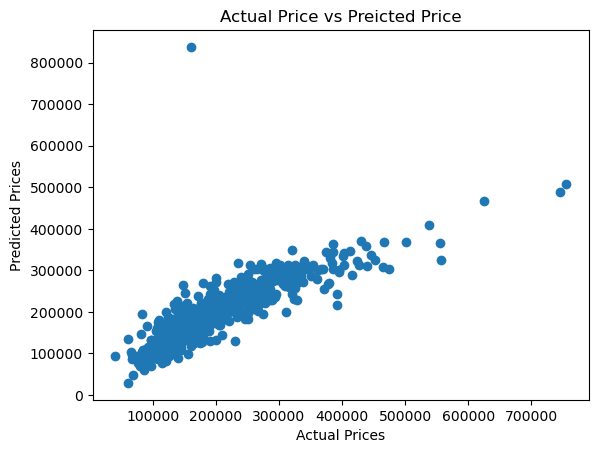

In [79]:
# accuracy for prediction on training data
training_data_prediction = svr.predict(X_TRAIN)
print(training_data_prediction)
# R squared error
score_1 = metrics.r2_score(Y_TRAIN, training_data_prediction)
# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_TRAIN,
training_data_prediction)
print("R squared : ", score_1)
print('Mean Absolute Error : ', score_2)
plt.scatter(Y_TRAIN, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

Prediction on Test Data

[364884.25519221 148592.52282461 178961.09290167 219755.70479516
 106425.76215868 166468.4746495  142852.74025395  87738.96502174
 103195.27316886 221722.75628918 190129.68783756 182242.37083953
 146942.53085568 152333.98129317 266152.86394151 219827.60694613
 167981.67992457 154635.49155343 235862.5752921  277395.2901242
 146165.95679892 146269.04292681 206421.04962153 181624.40311318
 226758.93151698  90240.91594438 148362.60214671 144895.58292823
  87324.56571785 173498.15346741 250611.59904554 165492.82620276
 124656.1771363  102535.65238542 263388.51381784 136854.97526664
 190297.4380051  279757.29014046 206580.16506786 136804.57464542
 155879.36374446 326879.83426651  89119.29841603 234057.160709
 118196.50339396 105590.72197463 282068.44375404 138584.59008514
 146252.2219071  227413.75746177 121451.23806599 181316.1141737
 183275.16120335 204452.9518738  173211.26002207 144808.84640812
 162156.08895265 176812.87882056 182231.26047567 261084.80412714
 254788.83785505 153380.06923

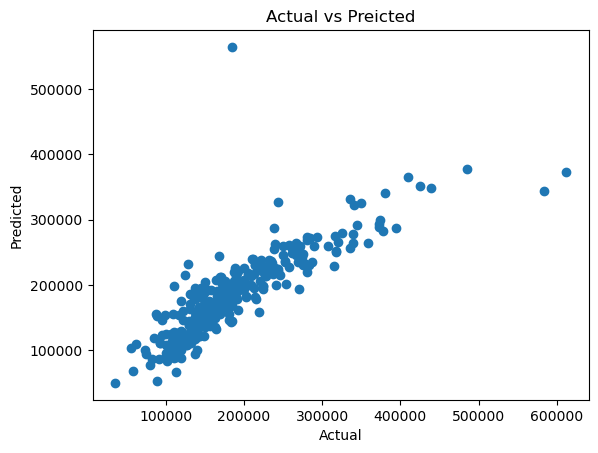

In [81]:
y_pred = svr.predict(X_TEST)
y_pred
print(y_pred)
# R squared Score
score_1 = metrics.r2_score(Y_TEST, y_pred)
# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_TEST, y_pred)
print("R squared Score : ", score_1)
print('Mean Absolute Error : ', score_2)
plt.scatter(Y_TEST, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Preicted")
plt.show()

REGRESSION DECISION TREE

In [82]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 25)
# fit the regressor with X and Y data
regressor.fit(X_TRAIN, Y_TRAIN)
DecisionTreeRegressor(random_state=25)

DecisionTreeRegressor(random_state=25)

Prediction on Train Data

[184000. 216000. 129000. ... 229000.  87000. 110000.]
R squared :  1.0
Mean Absolute Error :  0.0


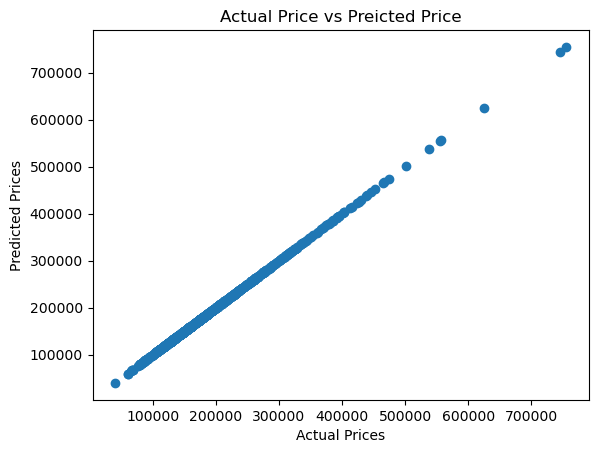

In [83]:
# accuracy for prediction on training data
training_data_prediction = regressor.predict(X_TRAIN)
print(training_data_prediction)
# R squared error
score_1 = metrics.r2_score(Y_TRAIN, training_data_prediction)
# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_TRAIN,
training_data_prediction)
print("R squared : ", score_1)
print('Mean Absolute Error : ', score_2)
plt.scatter(Y_TRAIN, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

Prediction on Test Data

[381000. 159895. 169990. 239900. 118500. 175500. 147000. 129900. 133000.
 225000. 196000. 157900. 160000. 169500. 465000. 160000. 149000. 159500.
 215200. 248000. 106000. 159000. 197900. 185000. 185000. 109900. 134450.
 137500. 120000. 146000. 255000. 207000. 128000. 119900. 281213. 141000.
 195400. 342643. 218000. 145250. 106000. 180000. 130000. 205000. 105000.
  67000. 378500. 107000. 111250. 183000. 159000. 194700. 110000. 213500.
 239500. 134000. 165000. 170000. 200141. 283463. 235000. 153500.  79500.
 142000. 168000. 136900.  96500. 230000. 117500. 466500. 142600. 140000.
 228950. 128500. 190000. 222000. 154000. 241500. 386250. 145250. 186000.
 169500. 130000. 194000. 134000. 265900. 306000. 235000. 144500. 139000.
 149000. 228950. 200500. 219500. 261500. 159000.  79000. 226000. 215000.
 193500. 231500. 231500. 185000. 224900. 147000. 229456. 202500. 235000.
  86000. 139000. 175000. 197900. 130000. 133000. 104900. 204000. 126000.
 165150. 150900. 159000. 139000. 270000. 165150. 12

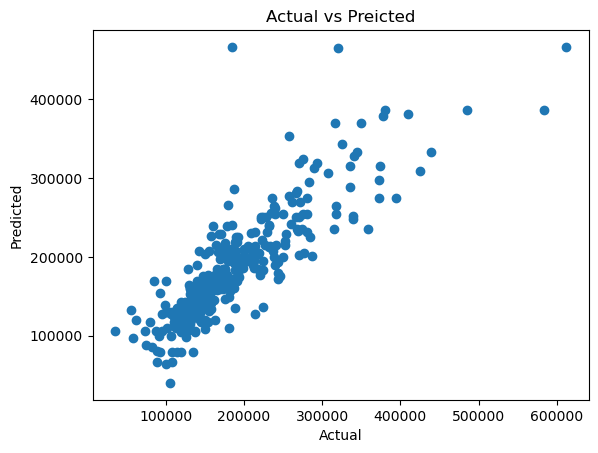

In [84]:
y_pred = regressor.predict(X_TEST)
y_pred
print(y_pred)
# R squared Score
score_1 = metrics.r2_score(Y_TEST, y_pred)
# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_TEST, y_pred)
print("R squared Score : ", score_1)
print('Mean Absolute Error : ', score_2)
plt.scatter(Y_TEST, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Preicted")
plt.show()

RANDOM FOREST

In [85]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=5, random_state=25)
# fit the regressor with X and Y data
regressor.fit(X_TRAIN, Y_TRAIN)
RandomForestRegressor(n_estimators=5, random_state=25)

RandomForestRegressor(n_estimators=5, random_state=25)

Prediction on Training Data

[185400. 209400. 129000. ... 231200.  94200. 110000.]
R squared error :  0.953848086010729
Mean Absolute Error :  8721.412884043608


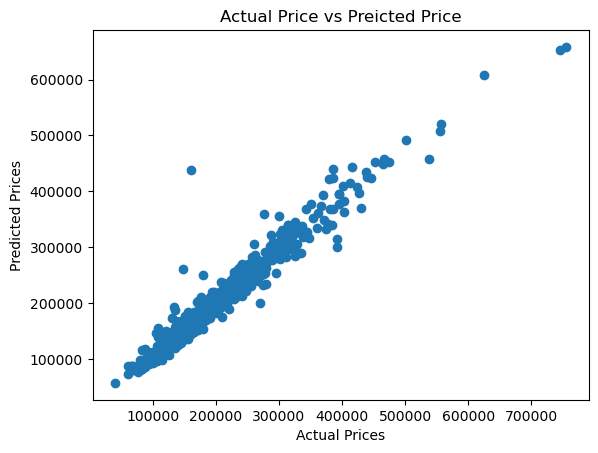

In [86]:
# accuracy for prediction on training data
training_data_prediction = regressor.predict(X_TRAIN)
print(training_data_prediction)
# R squared error
score_1 = metrics.r2_score(Y_TRAIN, training_data_prediction)
# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_TRAIN,
training_data_prediction)
print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)
plt.scatter(Y_TRAIN, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

Prediction on Test Data

R squared Score :  0.8240340718529836
Mean Absolute Error :  19628.08189910979


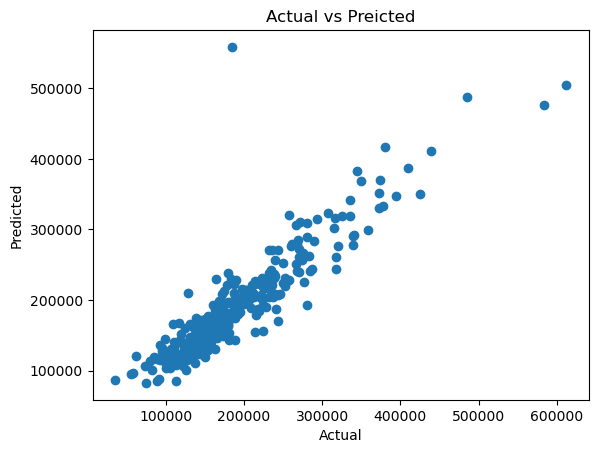

In [87]:
y_pred = regressor.predict(X_TEST)
y_pred
# R squared Score
score_1 = metrics.r2_score(Y_TEST, y_pred)
# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_TEST, y_pred)
print("R squared Score : ", score_1)
print('Mean Absolute Error : ', score_2)
plt.scatter(Y_TEST, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Preicted")
plt.show()

## Model Comparison
We trained multiple models and selected the best one based on evaluation metrics.


In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [115]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "SVM":SVR()
}


In [116]:
results = []

for name, model in models.items():
    model.fit(X_TRAIN, Y_TRAIN)
    y_pred = model.predict(X_TEST)
    r2 = r2_score(Y_TEST, y_pred)
    results.append((name, r2))


In [117]:
results_df = pd.DataFrame(results, columns=["Model", "R2"])
print(results_df)


               Model        R2
0  Linear Regression  0.785835
1      Decision Tree  0.732748
2      Random Forest  0.815392
3                SVM -0.043526


In [118]:
best_model = results_df.sort_values(by="R2", ascending=False).iloc[0]
print("Best Model:", best_model["Model"])
print("R2 Score:", best_model["R2"])


Best Model: Random Forest
R2 Score: 0.8153920354123414


## Model Comparison (R² Score)
We compared multiple regression models using R² score.
The model with the highest R² provides the best predictive performance.